# Figure 2

## Dependencies
To run this notebook the following packages should be installed:
- Rpy2 (https://rpy2.github.io/)
- Numpy
- Pandas
- Matplotlib

In [1]:
import rpy2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext rpy2.ipython
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams["font.size"] = 12

C:\Anaconda3_2021_05\envs\RPython\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [2]:
from rpy2.robjects import pandas2ri
import rpy2.robjects.packages as rpackages
import rpy2.robjects as ro
pandas2ri.activate()

In [3]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern,WhiteKernel,ConstantKernel
import statsmodels.api as sm

In [105]:
import os

In [107]:
os.chdir(r"C:\Users\21002223\OneDrive - Curtin University of Technology Australia\Datasets")
os.listdir()

['African_Domain_OceanicCrust.xlsx',
 'AllData_Delta_DM_Plume.xlsx',
 'AMD_OIBs.cpg',
 'AMD_OIBs.csv',
 'AMD_OIBs.dbf',
 'AMD_OIBs.prj',
 'AMD_OIBs.shp',
 'AMD_OIBs.shp.gplates.xml',
 'AMD_OIBs.shx',
 'AMD_OIBs.xlsx',
 'Brandl_Samples.xlsx',
 'Change-Points_PlumeGAM.xlsx',
 'Current_Ocean_Data - Copy.xlsx',
 'Current_Ocean_Data.csv',
 'Current_Ocean_Data.xlsx',
 'Delta_DM.xlsx',
 'Delta_DM_all.csv',
 'Delta_DM_AllData.xlsx',
 'Delta_DM_colors.cpt',
 'Delta_DM_Filtered.xlsx',
 'Delta_DM_Oph.xlsx',
 'Delta_DM_Oph_Plume.csv',
 'Delta_DM_Oph_Plume.xlsx',
 'Delta_DM_Plume.xlsx',
 'Delta_DM_Plume_median.xlsx',
 'Delta_DM_unique.xlsx',
 'Delta_DM_Upper.xlsx',
 'Delta_DM_Upper_MOR.xlsx',
 'Delta_DM_Upper_SSZ.xlsx',
 'Doucet2020_AfricanDomain.xlsx',
 'Doucet2020_PacificDomain.xlsx',
 'GMT_shapes',
 'IgneousProvinces',
 'IgneousProvinces.zip',
 'kimberlite_database.xlsx',
 'LLSVPs',
 'LLSVPs.zip',
 'Mahoney1998_CurrentOcean.xlsx',
 'Martin2022_ZirconData.csv',
 'Martin2022_ZirconData.xlsx',
 'Mi

In [155]:
loc = r"C:\Users\21002223\OneDrive - Curtin University of Technology Australia\Datasets"
#Plumes = pd.read_csv("https://raw.githubusercontent.com/pierosampaio/Paper1/main/Datasets/Plume_Data.csv")
Plumes = pd.read_excel(loc+"\\Delta_DM_Plume.xlsx")
UpperMantle = pd.read_csv("https://raw.githubusercontent.com/pierosampaio/Paper1/main/Datasets/UpperMantle_Data.csv")
PlumeOphiolites = pd.read_csv("https://raw.githubusercontent.com/pierosampaio/Paper1/main/Datasets/Oph_Plume_Data.csv")
#AllData = pd.read_csv("https://raw.githubusercontent.com/pierosampaio/Paper1/main/Datasets/Oph_Isotopes.csv")
AllData = pd.read_excel(loc+"\\Oph_Isotopes.xlsx",sheet_name="Filtered")
CurrentOcean = pd.read_csv(r"C:\Users\21002223\OneDrive - Curtin University of Technology Australia\Datasets\Current_Ocean_Data.csv")
OIB = pd.read_excel(loc+"\StrackeCompilation2022.xlsx",sheet_name="Data_OIB")
OOC = pd.read_csv("OldOceanicCrust_AMD.csv")
AMD_MOR = pd.read_csv("StrackeCompilation2022_MORB.csv")
Delta_DM(AMD_MOR,"Zero Age","iso143Nd144Nd")

OIB = OIB[["Location","Lat","Lon","NB","PB","CE","U",
            "K","RB","TH","LA",
            "143Nd/144Nd","iso87Sr86Sr","iso176Hf177Hf",
            "iso206Pb204Pb","iso207Pb204Pb","iso208Pb204Pb"]]
OIB = OIB.loc[OIB.Location!="Cameroon Line"]

African=['Amsterdam-Island','Ascension','Azores','Azores-SaoMiguel',
        'Canary Islands','Cape Verde Islands','Christmas Island',
        'Faroe Islands','Gough','Iceland','Jan Mayen','Kerguelen',
        'Madeira','Mauritius','Ninetyeast','Reunion','St. Helena',
         'St. Paul', 'Tristan da Cunha','Walvis Ridge'
        ]

OIB.loc[OIB.Location.isin(African),"Domain"] = "African"
OIB.loc[~OIB.Location.isin(African),"Domain"] = "Pacific"


AMD_OIBs = pd.read_excel(loc+"\AMD_OIBs.xlsx")
AMD_OIBs = AMD_OIBs.loc[(AMD_OIBs.Lat.notnull())&(AMD_OIBs.Age_rounded.notnull())]
AMD_OIBs.loc[AMD_OIBs.Location.str.contains("Kerguelen"),"Location"] = "Kerguelen"
AMD_OIBs = AMD_OIBs.loc[AMD_OIBs.Delta_DM<10]


AllData.eNd_i = AllData.eNd_i.astype("float64")
AllData["Age_rounded"] = -np.round(AllData["Age_FromRef"],-1)
AllData.loc[AllData.Kind.isin(["OIB","OPB"]),"Class"] = "Plume"
AllData.loc[~AllData.Kind.isin(["OIB","OPB"]),"Class"] = "UM"

In [ ]:
AMD

In [154]:
PresentOcean.loc[PresentOcean.Delta_DM.notnull()]

,Unnamed: 0,SAMPLE ID,IGSN,REFERENCES,LATITUDE,LONGITUDE,AGE,ROCK TYPE,ROCK NAME,143Nd/144Nd,...,TI.1,AS.2,AS.3,GER,INDIUM.1,SampleID,Lat,Lon,143Nd_ini_CALC,143Nd
0,14.0,208NMNH113716,NaN,"NEWSOM, 1986",-24.9800,79.0200,NaN,IGNEOUS:VOLCANIC:MAFIC,BASALT,0.513072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22.0,POLARK20-2-261-005,NaN,"NAURET, 2011",80.9243,-2.5253,NaN,IGNEOUS:VOLCANIC:MAFIC,BASALT,0.512872,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23.0,POLARK20-2-261-012,NaN,"NAURET, 2011",80.9243,-2.5253,NaN,IGNEOUS:VOLCANIC:MAFIC,BASALT,0.512885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24.0,POLARK20-2-261-017,NaN,"NAURET, 2011",80.9243,-2.5253,NaN,IGNEOUS:VOLCANIC:MAFIC,BASALT,0.512903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25.0,POLARK20-2-261-047,NaN,"NAURET, 2011",80.9243,-2.5253,NaN,IGNEOUS:VOLCANIC:MAFIC,BASALT,0.512901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,1825.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,s_AG99-197 [6897],-38.75,77.5,0.512903,0.512903
2841,1826.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,s_AG99-198 [6897],-38.75,77.5,0.512883,0.512883
2842,1827.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,s_AG99-199 [6897],-38.75,77.5,0.512878,0.512878
2843,1828.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,s_AG99-200 [6897],-38.75,77.5,0.512857,0.512857


In [5]:
def get_zero_crossing(df):
    zc = np.where(np.diff(np.sign(df)))[0]
    return zc

def Nd_CHUR(age):
    
    tt = age*1e6
    lbd_Nd = 6.54e-12 #Lugmair and Marti 1978
    mu_CHUR,a_CHUR = 0.1967, 0.512638 #Jacobsen and Wasserburg, 1980
    
    CHUR = a_CHUR - mu_CHUR*(np.exp(lbd_Nd*tt)-1)
    
    return CHUR

def DM_T(age):
    
    tt = age*1e6
    lbd_Nd = 6.54e-12
    mu_DM,a_DM = 0.222, 0.5131506379999999 #Michard et al. 1985
    
    DM = a_DM - mu_DM*(np.exp(lbd_Nd*tt)-1)
    
    return DM

def Nd_from_eNd(df,age_col_name):
    """Returns 143Nd/144Nd_i for samples for which only eNd_i data is available"""
    eNd_i = np.array(df["eNd_i"])
    
    CHUR = Nd_CHUR(np.array(df[age_col_name]))
        
    Samp143 = ((eNd_i/1e4)+1)*CHUR
        
    df["143Nd_CALC"] = Samp143
    
def Delta_DM(df,age_col_name,Nd_col_name):
    
    if age_col_name == "Zero Age":
        DM = DM_T(0)
    else:
        DM = DM_T(np.array(df[age_col_name]))
        
    Nd = np.array(df[Nd_col_name])
    
    Delta_DM = ((Nd/DM)-1)*1e4
    
    df["Delta_DM"] = Delta_DM
    
    
def resample_curve(df,column,sample_points):
    filtered_df = df.copy()
    ages = []
    for n in sample_points:
        idx=(np.abs(df[column] - n)).argmin()
        ages.append(idx)
    filtered_df = filtered_df.iloc[ages]
    return filtered_df

def geoTime(ax):
    Endpoints={
        "Tonian":-720,
        "Cry.":-635,
        "Edi.":-541,
        "Ꞓ":-485.4,
        "O":-443.8,
        "S":-419.2,
        "D":-358.9,
        "C":-298.9,
        "P":-251.9,
        "T":-201.3,
        "J":-145,
        "K":-66,
        "Pg":-23.03,
        "N":0
    }
    
    Bounds = list(Endpoints.values())
    Bounds.insert(0,-1000)
    B = np.array(Bounds)
    Midpoints = []

    for i in range(len(B)):
            if i < len(B)-1:
                Midpoints.append(B[i]-(B[i]-B[i+1])/2)
                
    for e in Endpoints:
        ax.axvline(x=Endpoints[e],ymin=0,ymax=0.1,lw=0.25,color="k")
    for i,p in enumerate(Endpoints.keys()):
        ax.annotate(p,xy=(Midpoints[i],ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])/20),fontsize=11,va="center", ha="center")
                
    ax.axhline(y=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])/10,
                   color="k",lw=0.25)

def w_avg(df,values,weights):
    d = df[values]
    w = df[weights]
    return (d * w).sum() / w.sum()             

In [156]:
Nd_from_eNd(AllData,"Age_FromRef")
Delta_DM(AllData,"Age_FromRef","143Nd_CALC")
Delta_DM(OIB,"Zero Age","143Nd/144Nd")
Delta_DM(AMD_OIBs,"Age","143Nd")

OIB_oph = AllData.loc[AllData.Kind.isin(["OIB","OPB"])]
UM_oph = AllData.loc[~AllData.Kind.isin(["OIB","OPB"])]

In [157]:
#Current Ocean dataset
OOC = OOC.loc[OOC.Delta_DM.notnull()]
OOC["Age"] = OOC.Uni_Age
OOC["Type"] = "UM"
AMD_MOR["Age"] = 0.
AMD_MOR["Type"] = "UM"
PresentOcean = pd.concat([OOC,AMD_MOR,AMD_OIBs])

In [7]:
Plumes

,Age_rounded,Delta_DM,yerr,Points_per_age,Locs_per_age,Weights
0,-900,-2.834502,0.371022,6,1,0.074830
1,-820,-3.033211,0.239841,2,1,0.024943
2,-650,-4.621297,0.000000,1,1,0.012472
3,-630,-2.797155,0.207953,20,1,0.249433
4,-570,-1.245970,0.958757,5,2,0.062358
5,-520,-2.641347,0.970706,11,1,0.137188
6,-500,-3.313440,1.051391,8,1,0.099773
7,-480,-2.405599,0.240923,7,4,0.087302
8,-470,-1.620339,0.229169,5,1,0.062358
9,-370,0.356122,0.507357,9,1,0.112245


# Fitting the GAMs

This part of the code uses the R cell magic to fit a GAM using the mgcv (Wood, 2017) and gratia (Simpson, 2023) packages for R. The code follows the paper by Simpson (2018). 

The R cell takes one of the pre-prepared datasets as input and outputs:
1. The fit
2. Simultaneous 95% confidence intervals
3. The first derivative of the fit with 95% confidence intervals
4. Curves simulated from the posterior distribution

In this case we are using adaptative GAMs for two reasons: (i) adaptative GAMs would respond better to any forcing and make it more evident; (ii) they yield the highest explained deviance results for all datasets

## GAM for the plume related rocks:
### Adaptative smoothing:

In [18]:
%%R -i Plumes -o Plume_fit,Plume_conf,Plume_sims,Plume_deriv_sint

library(mgcv)
library(gratia)

m <- gam(Delta_DM ~ s(Age_rounded,k=20,bs="ad"),
         method="REML",data=Plumes,weights=Weights) # Adaptative smoothing



N <- 900
Plume_fit <- with(Plumes, data.frame(Age_rounded = seq(min(Age_rounded),max(Age_rounded),length.out=N)))
Plume_fit <- cbind(Plume_fit, data.frame(predict(m,Plume_fit,se.fit=TRUE)))

crit.t <- qt(0.975, df=df.residual(m))


Plume_fit <- transform(Plume_fit,
                     upper = fit + (crit.t * se.fit),
                     lower = fit - (crit.t * se.fit))

# Posterior Simulation

nsim <- 100

Plume_sims <- simulate(m,nsim=nsim,newdata=Plume_fit,unconditional=TRUE)



#rearrange output
colnames(Plume_sims) <- paste0("sim",seq_len(nsim))
Plume_sims <- setNames(stack(as.data.frame(Plume_sims)),c("Simulated","run"))
Plume_sims <- transform(Plume_sims, Age <- rep(Plume_fit$Age_rounded,nsim))


# Simultaneous confidence intervals
Plume_conf <- with(Plume_fit,cbind(Plume_fit,nsim=nsim,type="simultaneous"),Age=Age_rounded)

Plume_deriv.tp <- fderiv(m,newdata=Plume_fit,n=N)



Plume_deriv_sint <- with(Plume_fit,
                     cbind(confint(Plume_deriv.tp,nsim=nsim,
                                  type="simultaneous"),
                          Age = Age_rounded))

summary(m)


R[write to console]: Loading required package: nlme

R[write to console]: This is mgcv 1.8-41. For overview type 'help("mgcv-package")'.

R[write to console]: Use of the `newdata` argument is deprecated.
Instead, use the data argument `data`.





Family: gaussian 
Link function: identity 

Formula:
Delta_DM ~ s(Age_rounded, k = 20, bs = "ad")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4.7271     0.4379  -10.79 1.65e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                 edf Ref.df     F  p-value    
s(Age_rounded) 3.887  4.563 14.98 1.34e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.675   Deviance explained =   72%
-REML = 74.007  Scale est. = 1.0006    n = 33


In [19]:
%%R -i Plumes -o Plume_fit_tp,Plume_conf_tp,Plume_sims,Plume_deriv_sint_tp

library(mgcv)
library(gratia)

m <- gam(Delta_DM ~ s(Age_rounded,k=20,bs="tp"),method="REML",data=Plumes,weights=Weights) # Adaptative smoothing



N <- 300
Plume_fit_tp <- with(Plumes, data.frame(Age_rounded = seq(min(Age_rounded),max(Age_rounded),length.out=N)))
Plume_fit_tp <- cbind(Plume_fit_tp, data.frame(predict(m,Plume_fit_tp,se.fit=TRUE)))

crit.t <- qt(0.975, df=df.residual(m))


Plume_fit_tp <- transform(Plume_fit_tp,
                     upper = fit + (crit.t * se.fit),
                     lower = fit - (crit.t * se.fit))

# Posterior Simulation

nsim <- 100

Plume_sims <- simulate(m,nsim=nsim,newdata=Plume_fit_tp,unconditional=TRUE)



#rearrange output
colnames(Plume_sims) <- paste0("sim",seq_len(nsim))
Plume_sims <- setNames(stack(as.data.frame(Plume_sims)),c("Simulated","run"))
Plume_sims <- transform(Plume_sims, Age <- rep(Plume_fit$Age_rounded,nsim))


# Simultaneous confidence intervals
Plume_conf_tp <- with(Plume_fit_tp,cbind(Plume_fit_tp,nsim=nsim,type="simultaneous"),Age=Age_rounded)

Plume_deriv.tp <- fderiv(m,newdata=Plume_fit,n=N)



Plume_deriv_sint_tp <- with(Plume_fit,
                     cbind(confint(Plume_deriv.tp,nsim=nsim,
                                  type="simultaneous"),
                          Age = Age_rounded))

summary(m)

R[write to console]: Use of the `newdata` argument is deprecated.
Instead, use the data argument `data`.





Family: gaussian 
Link function: identity 

Formula:
Delta_DM ~ s(Age_rounded, k = 20, bs = "tp")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4.7610     0.4653  -10.23 1.19e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                 edf Ref.df     F  p-value    
s(Age_rounded) 5.779  7.033 8.503 2.06e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.645   Deviance explained = 71.4%
-REML = 79.692  Scale est. = 1.0951    n = 33


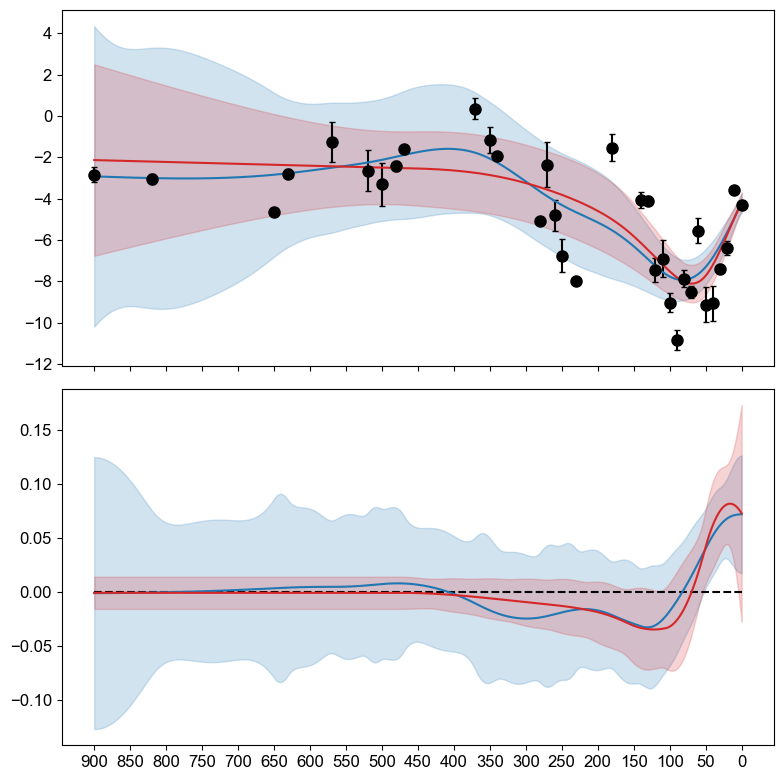

In [37]:
fig,ax = plt.subplots(2,1,figsize=(8,8),sharex=True)

ax[0].errorbar(
    Plumes.Age_rounded,
    Plumes.Delta_DM,
    yerr=Plumes.yerr,
    fmt="o",
    ms=8,
    markeredgecolor="k",
    capsize=2.5,
    color="black",
    label="Plume data",
)


ax[0].plot(Plume_conf_tp.Age_rounded,
           Plume_conf_tp.fit,
           color="tab:blue",
           label="TPRS")

ax[0].plot(Plume_conf.Age_rounded,    #Adaptative smoothing
           Plume_conf.fit,
           color="tab:red",
           label="Adaptative smoothing")


ax[0].fill_between(Plume_conf_tp.Age_rounded,
                   Plume_conf_tp.lower,
                   Plume_conf_tp.upper,
                   alpha=0.2,
                   color="tab:blue")

ax[0].fill_between(Plume_conf.Age_rounded,    #Adaptative
                   Plume_conf.lower,
                   Plume_conf.upper,
                   alpha=0.2,
                   color="tab:red")

##############################################################################
ax[1].plot(
    [-900,0],
    [0,0],
    "--k"
)


ax[1].plot(Plume_deriv_sint_tp.Age,
           Plume_deriv_sint_tp.est,
           color="tab:blue")

ax[1].fill_between(Plume_deriv_sint_tp.Age,
                   Plume_deriv_sint_tp.lower,
                   Plume_deriv_sint_tp.upper,
                   alpha=0.2,
                   color="tab:blue")


ax[1].plot(Plume_deriv_sint.Age,    #Adaptative
           Plume_deriv_sint.est,
           color="tab:red")

ax[1].fill_between(Plume_deriv_sint.Age,
                   Plume_deriv_sint.lower,
                   Plume_deriv_sint.upper,
                   alpha=0.2,
                   color="tab:red")



ax[1].set_xticks(np.arange(-900, 1, 50))
ax[1].set_xticklabels([str(i) for i in np.arange(0, 901, 50)[::-1]])

plt.tight_layout()


In [12]:
Plume_deriv_sint

,term,lower,est,upper,Age
1,s(Age_rounded),-0.017153,0.000063,0.017280,-900.000000
2,s(Age_rounded),-0.017153,0.000063,0.017280,-898.998888
3,s(Age_rounded),-0.017153,0.000063,0.017280,-897.997775
4,s(Age_rounded),-0.017153,0.000063,0.017280,-896.996663
5,s(Age_rounded),-0.017153,0.000063,0.017280,-895.995551
...,...,...,...,...,...
896,s(Age_rounded),0.018235,0.101182,0.184129,-4.004449
897,s(Age_rounded),0.013385,0.100994,0.188602,-3.003337
898,s(Age_rounded),0.008267,0.100748,0.193230,-2.002225
899,s(Age_rounded),0.002885,0.100446,0.198007,-1.001112


In [27]:
Plume_deriv_sint.iloc[get_zero_crossing(Plume_deriv_sint.est)[0]]

term     s(Age_rounded)
lower         -0.041237
est            -0.00112
upper          0.038997
Age          -84.093437
Name: 816, dtype: object

In [460]:
AMD_OIBs.loc[AMD_OIBs.Lat<0].groupby("Age_rounded").Delta_DM.mean()

Age_rounded
0      -7.206001
10     -5.077222
20     -9.491182
30     -7.743663
40     -9.069141
50     -9.127795
60     -7.900421
70     -8.949078
80     -8.559349
90    -10.842769
100    -9.311082
110   -10.035405
120    -7.934495
130    -9.398334
Name: Delta_DM, dtype: float64

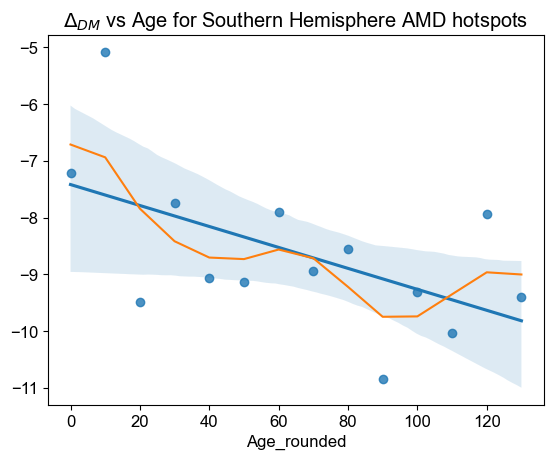

In [462]:
AMD_OIBs = AMD_OIBs.loc[(AMD_OIBs.Lat.notnull())&(AMD_OIBs.Age_rounded.notnull())]
ax = sns.regplot(
    x=AMD_OIBs.loc[AMD_OIBs.Lat<0].groupby("Age_rounded").Delta_DM.mean().index,
    y=AMD_OIBs.loc[AMD_OIBs.Lat<0].groupby("Age_rounded").Delta_DM.mean().values
)

from scipy.ndimage import gaussian_filter1d


d = AMD_OIBs.loc[AMD_OIBs.Lat<0].groupby("Age_rounded")["Delta_DM"].mean()
gf1 = gaussian_filter1d(d,1)


eval_x = d.index

ax.set_title("$\Delta_{DM}$ vs Age for Southern Hemisphere AMD hotspots")

ax.plot(eval_x,gf1)

slope: -0.018358713657447647, p: 0.042907397353946435


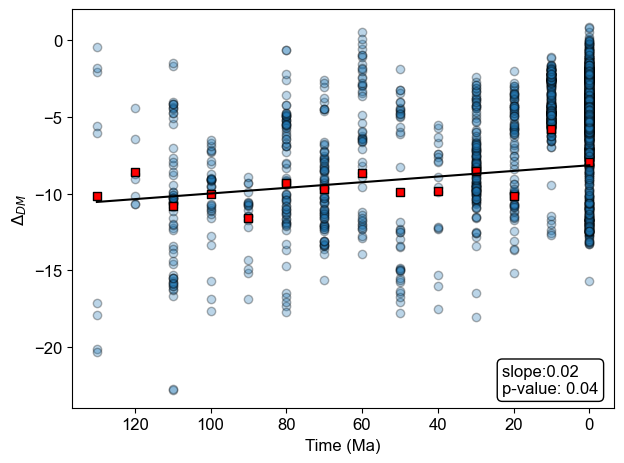

In [97]:
from scipy.stats import linregress

fig,ax = plt.subplots()

x = AMD_OIBs.loc[AMD_OIBs.Lat<0].groupby("Age_rounded").Delta_DM.mean().index
y = AMD_OIBs.loc[AMD_OIBs.Lat<0].groupby("Age_rounded").Delta_DM.mean()

slope, intercept, r, p, std_err = linregress(x, y)

print(
    f"slope: {slope}, p: {p}"
)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))


ax.scatter(
    -AMD_OIBs.Age_rounded,
    AMD_OIBs.Delta_DM,
    color="tab:blue",alpha=0.3,
    edgecolor="black"
)
ax.scatter(-x, y,color="red",marker="s",edgecolor="black")
ax.plot(-x, mymodel,"-k")
ax.set_xlabel("Time (Ma)")
ax.set_ylabel("$\Delta_{DM}$")

ax.set_xticks(np.arange(-120,1,20))
ax.set_xticklabels(np.arange(0,121,20)[::-1])

bbox = dict()
ax.annotate(f"slope:{np.round(-slope,2)} \np-value: {np.round(p,2)}",
            xy=(-23,-23),xycoords="data",fontsize=12,bbox=dict(boxstyle="round", fc="w"))

plt.tight_layout()
fig.savefig(savedir+"\\SouthernHemispherePlumes.png",dpi=300)

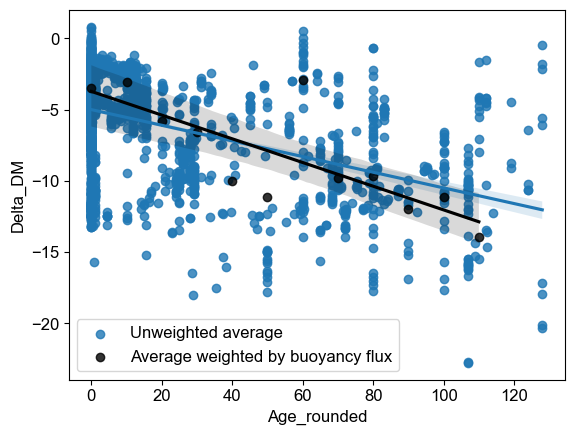

In [159]:
AMD_OIBs.loc[AMD_OIBs.Location.isin(['ERGR', 'WRGR', 'DSDP SITE 516', 'CJCSC', 'NJCSC', 'Tristan Track',
       'Gough Track', 'Walvis Ridge']),"Plume"] = "Tristan"
AMD_OIBs.loc[AMD_OIBs.Location.isin(["Madeira","Godzilla"]),"Plume"] = "Madeira"
AMD_OIBs.loc[AMD_OIBs.Location=="Vitoria-Trindade","Plume"] = "Trindade"
AMD_OIBs.loc[AMD_OIBs.Location.isin({"Bahia Seamounts","Christmas Island"}),"Plume"] = "Unknown"
AMD_OIBs.loc[AMD_OIBs.Location=="Discovery","Plume"] = "Discovery"
AMD_OIBs.loc[AMD_OIBs.Location=="Shona-Meteor","Plume"] = "Shona-Meteor"
AMD_OIBs.loc[AMD_OIBs.Location.isin(['Afanasy-Nikitin Rise', 'Crozet']),"Plume"] = "Crozet"
AMD_OIBs.loc[AMD_OIBs.Location=="Ascension","Plume"] = "Ascension"
AMD_OIBs.loc[AMD_OIBs.Location.isin(['Azores', 'Azores-SaoMiguel']),"Plume"] = "Azores"
AMD_OIBs.loc[AMD_OIBs.Location.isin(['Amsterdam-Island','St. Paul']),"Plume"] = "Amsterdam"
AMD_OIBs.loc[AMD_OIBs.Location.isin(['Heard Island', 'Kerguelen']),"Plume"] = "Kerguelen"
AMD_OIBs.loc[AMD_OIBs.Location.isin(['Iceland','Faroe Islands']),"Plume"] = "Iceland"
AMD_OIBs.loc[AMD_OIBs.Location.isin(['Mauritius','Reunion']),"Plume"] = "Reunion"
AMD_OIBs.loc[AMD_OIBs.Location=="St. Helena","Plume"] = "St. Helena"
AMD_OIBs.loc[AMD_OIBs.Location=="Canary Islands","Plume"] = "Canary"
AMD_OIBs.loc[AMD_OIBs.Location=="Cape Verde Islands","Plume"] = "Cape Verde"
AMD_OIBs.loc[AMD_OIBs.Location=="Jan Mayen","Plume"] = "Jan Mayen"


PlumeFluxes = {
    "Tristan":1.0,
    "Madeira":0.5,
    "Trindade":0.7,
    "Discovery":0.5,
    "Shona-Meteor":0.5,
    "Crozet":0.6,
    "Reunion":1.4,
    "Amsterdam":0.5,
    "Ascension":0.8,
    "Azores":1.1,
    "Canary":0.8,
    "Cape Verde":1.1,
    "Iceland":5.5,
    "Jan Mayen":0.6,
    "St. Helena":0.5,
    "Unknown":0.5
}


AMD_OIBs["BuoyancyFlux"] = AMD_OIBs.Plume.map(PlumeFluxes)
W_Avgs = AMD_OIBs.groupby("Age_rounded").apply(w_avg,"Delta_DM","BuoyancyFlux")
Avgs = AMD_OIBs.groupby("Age_rounded").Delta_DM.mean()

ax = sns.regplot(
    AMD_OIBs,
    x="Age",y="Delta_DM",label="Unweighted average"
)

#ax.scatter(
#    x=AMD_OIBs.Age_rounded,
#    y=AMD_OIBs.Delta_DM
#)
sns.regplot(x=W_Avgs.index,y=W_Avgs.values,color="k",ax=ax,label="Average weighted by buoyancy flux")
ax.legend()

In [75]:
Avgs.to_clipboard()

In [67]:
AMD_OIBs.Plume.unique()

array(['Tristan', 'Madeira', 'Trindade', 'Unknown', 'Discovery',
       'Shona-Meteor', 'Crozet', 'Reunion', 'Amsterdam', 'Ascension',
       'Azores', 'Canary', 'Cape Verde', 'Iceland', 'Jan Mayen',
       'St. Helena'], dtype=object)

In [20]:
TippingAge_tp = Plume_deriv_sint_tp.Age[get_zero_crossing(Plume_deriv_sint_tp.upper)]
TippingAge_tp_center = Plume_deriv_sint_tp.Age[get_zero_crossing(Plume_deriv_sint_tp.est)]
TippingAge = Plume_deriv_sint.Age[get_zero_crossing(Plume_deriv_sint.upper)]

print(f"Significant change begins at {-int(TippingAge)} Ma")

Significant change begins at 421 Ma


In [18]:
TippingAge = Plume_deriv_sint.Age[get_zero_crossing(Plume_deriv_sint.upper)]
print(f"Significant change begins at {-int(TippingAge)} Ma")

Significant change begins at 421 Ma


# Comparison between methods

KeyError: 'fit.1'

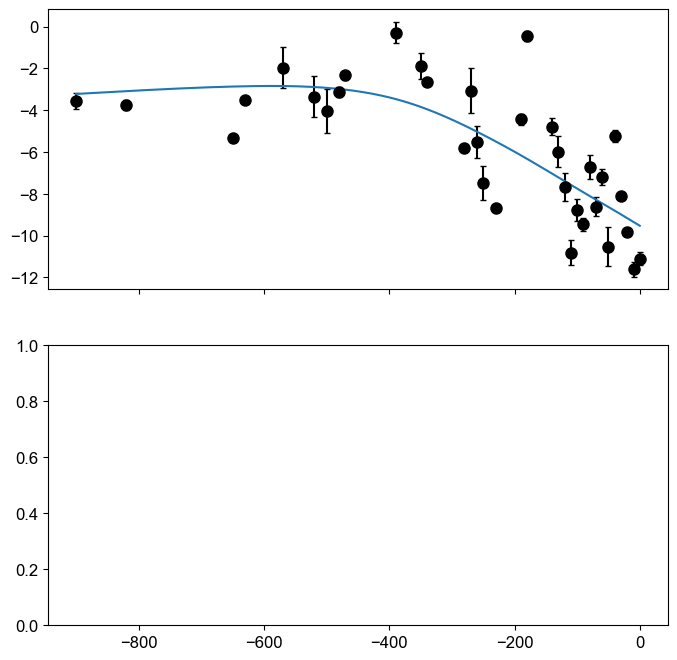

In [21]:
fig,ax = plt.subplots(2,1,figsize=(8,8),sharex=True)

ax[0].errorbar(
    Plumes.Age_rounded,
    Plumes.Delta_DM,
    yerr=Plumes.yerr,
    fmt="o",
    ms=8,
    markeredgecolor="k",
    capsize=2.5,
    color="black",
    label="Plume data",
)


ax[0].plot(Plume_conf_tp.Age_rounded,
           Plume_conf_tp.fit,
           color="tab:blue",
           label="TPRS")

ax[0].plot(Plume_conf.Age_rounded,    #Adaptative smoothing
           Plume_conf["fit.1"],
           color="tab:red",
           label="Adaptative smoothing")



ax[0].fill_between(Plume_conf.Age_rounded,
                   Plume_conf.lower,
                   Plume_conf.upper,
                   alpha=0.2,
                   color="tab:blue")

ax[0].fill_between(Plume_conf.Age_rounded,    #Adaptative
                   Plume_conf["lower.1"],
                   Plume_conf["upper.1"],
                   alpha=0.2,
                   color="tab:red")





##############################################################################
ax[1].plot(
    [-900,0],
    [0,0],
    "--k"
)


ax[1].plot(Plume_deriv_sint_tp.Age,
           Plume_deriv_sint_tp.est,
           color="tab:blue")

ax[1].fill_between(Plume_deriv_sint_tp.Age,
                   Plume_deriv_sint_tp.lower,
                   Plume_deriv_sint_tp.upper,
                   alpha=0.2,
                   color="tab:blue")


ax[1].plot(Plume_deriv_sint_ad.Age,    #Adaptative
           Plume_deriv_sint_ad.est,
           color="tab:red")

ax[1].fill_between(Plume_deriv_sint_ad.Age,
                   Plume_deriv_sint_ad.lower,
                   Plume_deriv_sint_ad.upper,
                   alpha=0.2,
                   color="tab:red")





ax[1].plot(
    [Plume_deriv_sint_tp.Age[np.where(np.diff(np.sign(Plume_deriv_sint_tp.upper)))[0][0]],
     Plume_deriv_sint_tp.Age[np.where(np.diff(np.sign(Plume_deriv_sint_tp.upper)))[0][0]]],
    [-0.031,0.028],
    "--k"
)

ax[1].plot(
    [Plume_deriv_sint_tp.Age[np.where(np.diff(np.sign(Plume_deriv_sint_tp.upper)))[0][1]],
     Plume_deriv_sint_tp.Age[np.where(np.diff(np.sign(Plume_deriv_sint_tp.upper)))[0][1]]],
    [-0.031,0.028],
    "--k"
)


ax[1].fill_betweenx(
    y=[-0.031,0.028],
    x1=Plume_deriv_sint_tp.Age[np.where(np.diff(np.sign(Plume_deriv_sint_tp.upper)))[0][0]],
    x2=Plume_deriv_sint_tp.Age[np.where(np.diff(np.sign(Plume_deriv_sint_tp.upper)))[0][1]],
    color="gray",
    alpha=0.2
)

ax[1].annotate(
    "Statistically significant\nchange in TPRS model",
    (-180,0.015),
    ha="center",
    fontsize=10
)


# Data Density
PD = AllData.loc[AllData.Class=="Plume"]
ax[0].plot(-AllData.loc[AllData.Class=="Plume","Age_FromRef"],
           [-12]*210,
           "|",
           color="k")



# Plot settings
ax[0].set(ylabel="$\Delta_{DM}$")
ax[0].legend(loc="upper left")



ax[1].set(xlabel="Time (Ma)",
          ylabel="First derivative of the fitted curve")

ax[1].set_xlim(-920, 20)
ax[1].set_ylim(-0.032,0.03)
ax[1].set_xticks(np.arange(-900, 1, 100))
ax[1].set_xticklabels([str(i) for i in np.arange(0, 901, 100)[::-1]])

plt.tight_layout()

fig.savefig(savedir+"\\GAM_comparison.png",dpi=300)

In [32]:
%%R -i PlumeOphiolites -o PlumeOph_fit,PlumeOph_conf,PlumeOph_deriv_sint,PlumeOph_sims,PlumeOph_deriv_sint_ad,PlumeOph_deriv_sint_tp

library(mgcv)
library(gratia)

m <- gam(Delta_DM ~ s(Age_rounded,k=20,bs="ad"),method="REML",data=PlumeOphiolites,weights=Weights)
m.ad <- gam(Delta_DM ~ s(Age_rounded,k=20,bs="ad"),method="REML",data=PlumeOphiolites,weights=Weights)
m.tp <- gam(Delta_DM ~ s(Age_rounded,k=20,bs="tp"),method="REML",data=PlumeOphiolites,weights=Weights)


N <- 300
PlumeOph_fit <- with(PlumeOphiolites, data.frame(Age_rounded = seq(min(Age_rounded),max(Age_rounded),length.out=N)))
PlumeOph_fit <- cbind(PlumeOph_fit, data.frame(predict(m,PlumeOph_fit,se.fit=TRUE)))
PlumeOph_fit <- cbind(PlumeOph_fit, data.frame(predict(m.ad,PlumeOph_fit,se.fit=TRUE))) #fit.1
PlumeOph_fit <- cbind(PlumeOph_fit, data.frame(predict(m.tp,PlumeOph_fit,se.fit=TRUE))) #fit.2

crit.t <- qt(0.975, df=df.residual(m))
crit.t.1 <- qt(0.975, df=df.residual(m.ad))
crit.t.2 <- qt(0.975, df=df.residual(m.tp))

PlumeOph_fit <- transform(PlumeOph_fit,
                     upper = fit + (crit.t * se.fit),
                     lower = fit - (crit.t * se.fit))

PlumeOph_fit <- transform(PlumeOph_fit,
                     upper.1 = fit.1 + (crit.t.1 * se.fit.1),
                     lower.1 = fit.1 - (crit.t.1 * se.fit.1))

PlumeOph_fit <- transform(PlumeOph_fit,
                     upper.2 = fit.2 + (crit.t.2 * se.fit.2),
                     lower.2 = fit.2 - (crit.t.2 * se.fit.2))

# Posterior Simulation

nsim <- 100

PlumeOph_sims <- simulate(m,nsim=nsim,newdata=PlumeOph_fit,unconditional=TRUE)
PlumeOph_sims <- simulate(m.ad,nsim=nsim,newdata=PlumeOph_fit,unconditional=TRUE)
PlumeOph_sims <- simulate(m.tp,nsim=nsim,newdata=PlumeOph_fit,unconditional=TRUE)


#rearrange output
colnames(PlumeOph_sims) <- paste0("sim",seq_len(nsim))
PlumeOph_sims <- setNames(stack(as.data.frame(PlumeOph_sims)),c("Simulated","run"))
PlumeOph_sims <- transform(PlumeOph_sims, Age <- rep(PlumeOph_fit$Age_rounded,nsim))


# Simultaneous confidence intervals
PlumeOph_conf <- with(PlumeOph_fit,cbind(PlumeOph_fit,nsim=nsim,type="simultaneous"),Age=Age_rounded)

PlumeOph_deriv <- fderiv(m,newdata=PlumeOph_fit,n=N)
PlumeOph_deriv.ad <- fderiv(m.ad,newdata=PlumeOph_fit,n=N)
PlumeOph_deriv.tp <- fderiv(m.tp,newdata=PlumeOph_fit,n=N)


PlumeOph_deriv_sint <- with(PlumeOph_fit,
                     cbind(confint(PlumeOph_deriv,nsim=nsim,
                                  type="simultaneous"),
                          Age = Age_rounded))
PlumeOph_deriv_sint_ad <- with(PlumeOph_fit,
                     cbind(confint(PlumeOph_deriv.ad,nsim=nsim,
                                  type="simultaneous"),
                          Age = Age_rounded))
PlumeOph_deriv_sint_tp <- with(PlumeOph_fit,
                     cbind(confint(PlumeOph_deriv.tp,nsim=nsim,
                                  type="simultaneous"),
                          Age = Age_rounded))

summary(m)

R[write to console]: Use of the `newdata` argument is deprecated.
Instead, use the data argument `data`.


R[write to console]: Use of the `newdata` argument is deprecated.
Instead, use the data argument `data`.


R[write to console]: Use of the `newdata` argument is deprecated.
Instead, use the data argument `data`.





Family: gaussian 
Link function: identity 

Formula:
Delta_DM ~ s(Age_rounded, k = 20, bs = "ad")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4.1558     0.3489  -11.91 4.23e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                 edf Ref.df     F p-value  
s(Age_rounded) 1.862  2.152 4.522  0.0213 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.267   Deviance explained = 32.4%
-REML = 50.045  Scale est. = 2.9834    n = 25


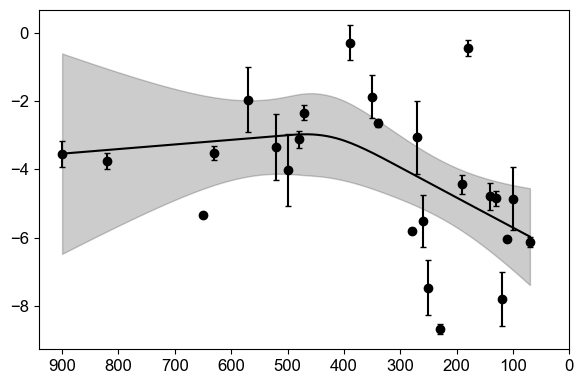

In [35]:
fig,ax = plt.subplots(figsize=(6,4),sharex=True)

ax.errorbar(
    PlumeOphiolites.Age_rounded,
    PlumeOphiolites.Delta_DM,
    yerr=PlumeOphiolites.yerr,
    fmt="o",
    ms=6,
    markeredgecolor="k",
    capsize=2.5,
    color="black",
    label="Plume data",
)


ax.plot(PlumeOph_fit.Age_rounded,
           PlumeOph_fit.fit,
           color="black",
           label="TPRS")


ax.fill_between(PlumeOph_fit.Age_rounded,
                   PlumeOph_fit.lower,
                   PlumeOph_fit.upper,
                   alpha=0.2,
                   color="black")




ax.set_xticks(np.arange(-900, 1, 100))
ax.set_xticklabels([str(i) for i in np.arange(0, 901, 100)[::-1]])

plt.tight_layout()

NameError: name 'PlumeOph_conf' is not defined

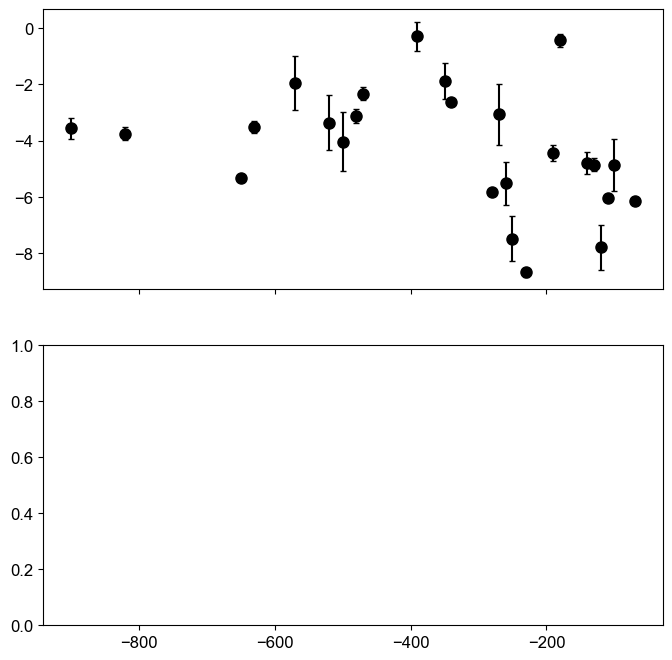

In [22]:
fig,ax = plt.subplots(2,1,figsize=(8,8),sharex=True)

ax[0].errorbar(
    PlumeOphiolites.Age_rounded,
    PlumeOphiolites.Delta_DM,
    yerr=PlumeOphiolites.yerr,
    fmt="o",
    ms=8,
    markeredgecolor="k",
    capsize=2.5,
    color="black",
    label="PlumeOph data",
)


ax[0].plot(PlumeOph_conf.Age_rounded,
           PlumeOph_conf.fit,
           color="tab:blue",
           label="Standard fit")

ax[0].plot(PlumeOph_conf.Age_rounded,    #Adaptative smoothing
           PlumeOph_conf["fit.1"],
           color="tab:red",
           label="Adaptative smoothing")

ax[0].plot(PlumeOph_conf.Age_rounded,    #Thin-plate regression
           PlumeOph_conf["fit.2"],
           color="tab:green",
           label="Thin-plate regression")

ax[0].fill_between(PlumeOph_conf.Age_rounded,
                   PlumeOph_conf.lower,
                   PlumeOph_conf.upper,
                   alpha=0.2,
                   color="tab:blue")

ax[0].fill_between(PlumeOph_conf.Age_rounded,    #Adaptative
                   PlumeOph_conf["lower.1"],
                   PlumeOph_conf["upper.1"],
                   alpha=0.2,
                   color="tab:red")

ax[0].fill_between(PlumeOph_conf.Age_rounded,    #TPRS
                   PlumeOph_conf["lower.2"],
                   PlumeOph_conf["upper.2"],
                   alpha=0.2,
                   color="tab:green")



##############################################################################
ax[1].plot(
    [-900,0],
    [0,0],
    "--k"
)


ax[1].plot(PlumeOph_deriv_sint.Age,
           PlumeOph_deriv_sint.est,
           color="tab:blue")

ax[1].fill_between(PlumeOph_deriv_sint.Age,
                   PlumeOph_deriv_sint.lower,
                   PlumeOph_deriv_sint.upper,
                   alpha=0.2,
                   color="tab:blue")


ax[1].plot(PlumeOph_deriv_sint_ad.Age,    #Adaptative
           PlumeOph_deriv_sint_ad.est,
           color="tab:red")

ax[1].fill_between(PlumeOph_deriv_sint_ad.Age,
                   PlumeOph_deriv_sint_ad.lower,
                   PlumeOph_deriv_sint_ad.upper,
                   alpha=0.2,
                   color="tab:red")


ax[1].plot(PlumeOph_deriv_sint_tp.Age,    #TPRS
           PlumeOph_deriv_sint_tp.est,
           color="tab:green")

ax[1].fill_between(PlumeOph_deriv_sint_tp.Age,
                   PlumeOph_deriv_sint_tp.lower,
                   PlumeOph_deriv_sint_tp.upper,
                   alpha=0.2,
                   color="tab:green")



ax[1].plot(
    [TippingAge_tp,TippingAge_tp],
    [-0.031,0.028],
    "--k"
)
ax[1].plot(
    [TippingAge_ad,TippingAge_ad],
    [-0.031,0.028],
    "--k"
)

ax[1].fill_betweenx(
    y=[-0.031,0.028],
    x1=TippingAge_ad,
    x2=TippingAge_tp,
    color="gray",
    alpha=0.2
)




# Plot settings
ax[0].set(ylabel="$\Delta_{DM}$")
ax[0].legend(loc="lower left")



ax[1].set(xlabel="Time (Ma)",
          ylabel="First derivative of the fitted curve")

ax[1].set_xlim(-920, 20)
ax[1].set_ylim(-0.032,0.03)
ax[1].set_xticks(np.arange(-900, 1, 100))
ax[1].set_xticklabels([str(i) for i in np.arange(0, 901, 100)[::-1]])
ax[0].set_title("Only Ophiolites (plume)")

plt.tight_layout()


## GAM for the upper mantle rocks:

In [14]:
UM_fit

,Age_rounded,fit,se.fit,fit.1,se.fit.1,upper,lower,upper.1,lower.1
1,-900.000000,-1.949606,0.546536,-2.223735,0.881384,-0.852064,-3.047147,-0.453462,-3.994008
2,-896.989967,-1.949738,0.543264,-2.218743,0.868071,-0.858768,-3.040707,-0.475211,-3.962276
3,-893.979933,-1.949869,0.539995,-2.213751,0.854921,-0.865464,-3.034275,-0.496630,-3.930872
4,-890.969900,-1.950001,0.536730,-2.208758,0.841943,-0.872152,-3.027851,-0.517703,-3.899813
5,-887.959866,-1.950133,0.533470,-2.203765,0.829144,-0.878831,-3.021435,-0.538417,-3.869112
...,...,...,...,...,...,...,...,...,...
296,-12.040134,-1.867399,0.160501,-1.784668,0.134894,-1.545085,-2.189713,-1.513732,-2.055604
297,-9.030100,-1.812311,0.149023,-1.767276,0.135869,-1.513047,-2.111576,-1.494382,-2.040169
298,-6.020067,-1.756112,0.140706,-1.749845,0.137561,-1.473551,-2.038674,-1.473552,-2.026138
299,-3.010033,-1.698942,0.138001,-1.732390,0.139968,-1.421812,-1.976072,-1.451261,-2.013518


In [9]:
UM = UpperMantle.copy()

In [33]:
%%R -i UpperMantle -o UpperMantle_fit,UpperMantle_conf,UpperMantle_deriv_sint,UpperMantle_sims

library(mgcv)
library(gratia)

m <- gam(Delta_DM ~ s(Age_rounded,k=20,bs="ad"),method="REML",data=UpperMantle,weights=Weights)

N <- 300
UpperMantle_fit <- with(UpperMantle, data.frame(Age_rounded = seq(min(Age_rounded),max(Age_rounded),length.out=N)))
UpperMantle_fit <- cbind(UpperMantle_fit, data.frame(predict(m,UpperMantle_fit,se.fit=TRUE)))
crit.t <- qt(0.975, df=df.residual(m))
UpperMantle_fit <- transform(UpperMantle_fit,
                     upper = fit + (crit.t * se.fit),
                     lower = fit - (crit.t * se.fit))

# Posterior Simulation

nsim <- 100

UpperMantle_sims <- simulate(m,nsim=nsim,newdata=UpperMantle_fit,unconditional=TRUE)

#rearrange output
colnames(UpperMantle_sims) <- paste0("sim",seq_len(nsim))
UpperMantle_sims <- setNames(stack(as.data.frame(UpperMantle_sims)),c("Simulated","run"))
UpperMantle_sims <- transform(UpperMantle_sims, Age <- rep(UpperMantle_fit$Age_rounded,nsim))


# Simultaneous confidence intervals
UpperMantle_conf <- with(UpperMantle_fit,cbind(UpperMantle_fit,nsim=nsim,type="simultaneous"),Age=Age_rounded)

UpperMantle_deriv <- fderiv(m,newdata=UpperMantle_fit,n=N)
UpperMantle_deriv_sint <- with(UpperMantle_fit,
                     cbind(confint(UpperMantle_deriv,nsim=nsim,
                                  type="simultaneous"),
                          Age = Age_rounded))

summary(m)

R[write to console]: Use of the `newdata` argument is deprecated.
Instead, use the data argument `data`.





Family: gaussian 
Link function: identity 

Formula:
Delta_DM ~ s(Age_rounded, k = 20, bs = "ad")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.1115     0.1707  -12.37   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                 edf Ref.df    F p-value  
s(Age_rounded) 2.612  3.099 2.74  0.0528 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.0647   Deviance explained = 16.8%
-REML =  97.41  Scale est. = 0.65681   n = 54


In [34]:
%%R -i UpperMantle -o UpperMantle_fit_tp,UpperMantle_conf_tp,UpperMantle_deriv_sint_tp,UpperMantle_sims

library(mgcv)
library(gratia)

m <- gam(Delta_DM ~ s(Age_rounded,k=20,bs="tp"),method="REML",data=UpperMantle,weights=Weights)

N <- 300
UpperMantle_fit_tp <- with(UpperMantle, data.frame(Age_rounded = seq(min(Age_rounded),max(Age_rounded),length.out=N)))
UpperMantle_fit_tp <- cbind(UpperMantle_fit_tp, data.frame(predict(m,UpperMantle_fit_tp,se.fit=TRUE)))
crit.t <- qt(0.975, df=df.residual(m))
UpperMantle_fit_tp <- transform(UpperMantle_fit_tp,
                     upper = fit + (crit.t * se.fit),
                     lower = fit - (crit.t * se.fit))

# Posterior Simulation

nsim <- 100

UpperMantle_sims <- simulate(m,nsim=nsim,newdata=UpperMantle_fit,unconditional=TRUE)

#rearrange output
colnames(UpperMantle_sims) <- paste0("sim",seq_len(nsim))
UpperMantle_sims <- setNames(stack(as.data.frame(UpperMantle_sims)),c("Simulated","run"))
UpperMantle_sims <- transform(UpperMantle_sims, Age <- rep(UpperMantle_fit$Age_rounded,nsim))


# Simultaneous confidence intervals
UpperMantle_conf_tp <- with(UpperMantle_fit_tp,cbind(UpperMantle_fit_tp,nsim=nsim,type="simultaneous"),Age=Age_rounded)

UpperMantle_deriv <- fderiv(m,newdata=UpperMantle_fit,n=N)
UpperMantle_deriv_sint_tp <- with(UpperMantle_fit_tp,
                     cbind(confint(UpperMantle_deriv,nsim=nsim,
                                  type="simultaneous"),
                          Age = Age_rounded))

summary(m)

R[write to console]: Use of the `newdata` argument is deprecated.
Instead, use the data argument `data`.





Family: gaussian 
Link function: identity 

Formula:
Delta_DM ~ s(Age_rounded, k = 20, bs = "tp")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.0608     0.1787  -11.53 1.07e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                 edf Ref.df     F p-value
s(Age_rounded) 2.955   3.63 0.918   0.366

R-sq.(adj) =  0.0188   Deviance explained =   12%
-REML = 100.79  Scale est. = 0.69911   n = 54


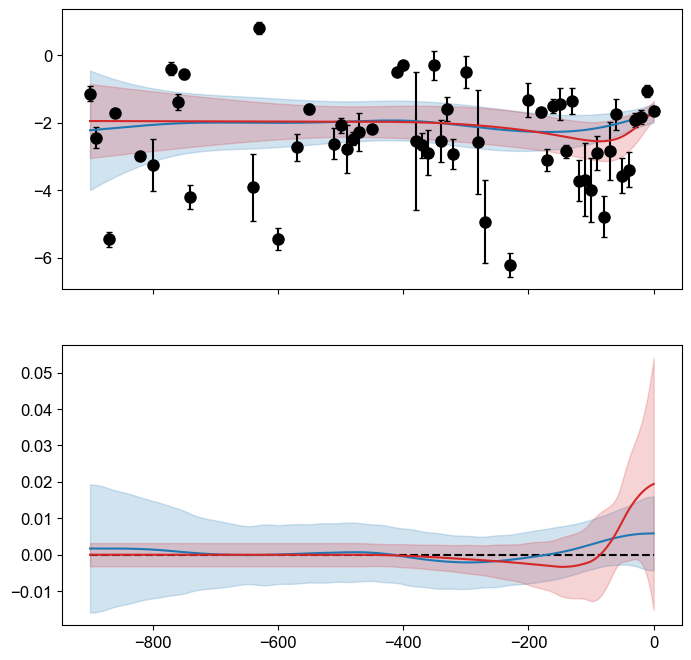

In [24]:
fig,ax = plt.subplots(2,1,figsize=(8,8),sharex=True)

ax[0].errorbar(
    UpperMantle.Age_rounded,
    UpperMantle.Delta_DM,
    yerr=UpperMantle.yerr,
    fmt="o",
    ms=8,
    markeredgecolor="k",
    capsize=2.5,
    color="black",
    label="UpperMantle data",
)


ax[0].plot(UpperMantle_conf_tp.Age_rounded,
           UpperMantle_conf_tp.fit,
           color="tab:blue",
           label="TPRS")

ax[0].plot(UpperMantle_conf.Age_rounded,    #Adaptative smoothing
           UpperMantle_conf.fit,
           color="tab:red",
           label="Adaptative smoothing")


ax[0].fill_between(UpperMantle_conf_tp.Age_rounded,
                   UpperMantle_conf_tp.lower,
                   UpperMantle_conf_tp.upper,
                   alpha=0.2,
                   color="tab:blue")

ax[0].fill_between(UpperMantle_conf.Age_rounded,    #Adaptative
                   UpperMantle_conf.lower,
                   UpperMantle_conf.upper,
                   alpha=0.2,
                   color="tab:red")

##############################################################################
ax[1].plot(
    [-900,0],
    [0,0],
    "--k"
)


ax[1].plot(UpperMantle_deriv_sint_tp.Age,
           UpperMantle_deriv_sint_tp.est,
           color="tab:blue")

ax[1].fill_between(UpperMantle_deriv_sint_tp.Age,
                   UpperMantle_deriv_sint_tp.lower,
                   UpperMantle_deriv_sint_tp.upper,
                   alpha=0.2,
                   color="tab:blue")


ax[1].plot(UpperMantle_deriv_sint.Age,    #Adaptative
           UpperMantle_deriv_sint.est,
           color="tab:red")

ax[1].fill_between(UpperMantle_deriv_sint.Age,
                   UpperMantle_deriv_sint.lower,
                   UpperMantle_deriv_sint.upper,
                   alpha=0.2,
                   color="tab:red")





In [103]:
Enrichment_Age

209   -273.913043
Name: Age_rounded, dtype: float64

In [162]:
Resampled_Plume,Resampled_UM = resample_curve(Plume_conf,"Age_rounded",np.arange(-900,1,50)),resample_curve(UpperMantle_conf,"Age_rounded",np.arange(-900,1,50))

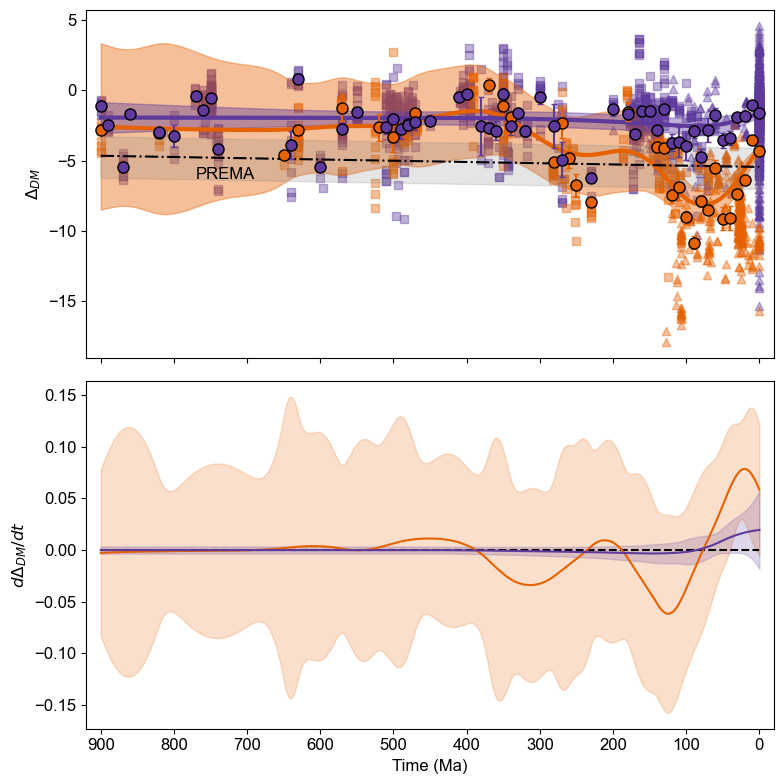

In [35]:
fig,ax = plt.subplots(2,1,figsize=(8,8),sharex=True)


#colorblind friendly colours:
yellow = "#E66100"
green = "#5D3A9B"


#ax[0].fill_between(
#    x=[-900,0],
#    y1=[-3.33,-3.89],
#    y2=[-14,-14],
#    color="lightgray",
#    alpha=0.4   
#)


############################### Ophiolite data ###############################

ax[0].scatter(-UM_oph.Age_FromRef,
              UM_oph.Delta_DM,
              color=green,
              alpha=0.4,
              marker="s"
              )


ax[0].scatter(-OIB_oph.Age_FromRef,
              OIB_oph.Delta_DM,
              color=yellow,
              alpha=0.4,
              marker="s"
              )


############################### Current ocean data ###############################

ax[0].scatter(-CurrentOcean.loc[CurrentOcean.Type=="UM"].Age,
              CurrentOcean.loc[CurrentOcean.Type=="UM"].Delta_DM,
              color=green,
              alpha=0.4,
              marker="^"
              )

ax[0].scatter(-CurrentOcean.loc[CurrentOcean.Type=="Plume"].Age,
              CurrentOcean.loc[CurrentOcean.Type=="Plume"].Delta_DM,
              color=yellow,
              alpha=0.4,
              marker="^"
              )





############################### Data and fit ###############################

ax[0].plot(Plume_conf.Age_rounded,
           Plume_conf.fit,
           color=yellow,
           lw=3,
           label="Plume fit")

ax[0].plot(UpperMantle_conf.Age_rounded,
           UpperMantle_conf.fit,
           color=green,
           lw=3,
           label="Upper mantle fit")

ax[0].fill_between(Plume_conf.Age_rounded,
                   Plume_conf.lower,
                   Plume_conf.upper,
                   alpha=0.4,
                   color=yellow)

ax[0].fill_between(UpperMantle_conf.Age_rounded,
                   UpperMantle_conf.lower,
                   UpperMantle_conf.upper,
                   alpha=0.4,
                   color=green)

#Median PREMA
ax[0].plot(
    [-900,0],
    [-4.66266,-5.45596],
    "-.k"
)

#IQR
ax[0].fill_between(
    [-900,0],
    [-6.22549,-7.01481],
    [-3.29517,-4.09197],
    alpha=0.2,
    color="gray"
)



ax[0].annotate("PREMA",xy=(-730,-6),xycoords="data",
                va="center", ha="center",fontsize=12)






ax[0].errorbar(
    Plumes.Age_rounded,
    Plumes.Delta_DM,
    yerr=Plumes.yerr,
    fmt="o",
    ms=8,
    markeredgecolor="k",
    capsize=2.5,
    color=yellow,
    label="Plume data",
)

ax[0].errorbar(
    UpperMantle.Age_rounded,
    UpperMantle.Delta_DM,
    yerr=UpperMantle.yerr,
    fmt="o",
    ms=8,
    markeredgecolor="k",
    capsize=2.5,
    color=green,
    label="Upper mantle data",
)




############################### Plot details ###############################


bottom,top = ax[0].get_ylim()
#ax[0].plot([-750,-750],[bottom,top],"--k")
#ax[0].plot([-175,-175],[bottom,top],"--k")


#ax[0].fill_betweenx(
#    y=[bottom,top],
#    x1=-670,
#    x2=-480,
#    color="gray",
#    alpha=0.2
#)


#an1 = ax[0].annotate("Rodinia", xy=(-(750+900)/2, 3), xycoords="data",
#                  va="center", ha="center",fontsize=12, annotation_clip=False)
#an3 = ax[0].annotate("Gondwana\n Formation", xy=(-(670+480)/2, 3), xycoords="data",
#                  va="center", ha="center",fontsize=12, annotation_clip=False)
#an4 = ax[0].annotate("Pangea\n Formation", xy=(-(400+320)/2, 3), xycoords="data",
#                  va="center", ha="center",fontsize=12, annotation_clip=False)
#an5 = ax[0].annotate("Pangea\ndispersal", xy=(-(175+-5)/2, 3), xycoords="data",
#                  va="center", ha="center",fontsize=12, annotation_clip=False)




############################### Derivatives ###############################

ax[1].plot(   # 0 Reference line --> no change
    [-900,0],
    [0,0],
    "--k"
)


ax[1].plot(Plume_deriv_sint.Age,
           Plume_deriv_sint.est,
           color=yellow)

ax[1].fill_between(Plume_deriv_sint.Age,
                   Plume_deriv_sint.lower,
                   Plume_deriv_sint.upper,
                   alpha=0.2,
                   color=yellow)

ax[1].plot(UpperMantle_deriv_sint.Age,
           UpperMantle_deriv_sint.est,
           color=green)

ax[1].fill_between(UpperMantle_deriv_sint.Age,
                   UpperMantle_deriv_sint.lower,
                   UpperMantle_deriv_sint.upper,
                   alpha=0.2,
                   color=green)


bottom,top = ax[1].get_ylim()


Enrichment_Age_Lower = Plume_conf.loc[(-Plume_conf["upper"]>6.84016)].iloc[0]["Age_rounded"]
Enrichment_Age_Med = Plume_conf.loc[(-Plume_conf["upper"]>5.1925)].iloc[0]["Age_rounded"]
Enrichment_Age_Upper = Plume_conf.loc[(-Plume_conf["upper"]>3.82735)].iloc[0]["Age_rounded"]





#ax[1].axvline(x=TippingAge,ymin=0.1,ls="--",color="k")




############################### Plot settings ###############################

ax[0].set(ylabel="$\Delta_{DM}$")


#h, l = ax[0].get_legend_handles_labels()
#order = [2, 0, 3, 1]
#h = [h[i] for i in order]
#l = [l[i] for i in order]
#ax[0].legend(h, l, loc="lower left",ncols=2)





ax[1].set(xlabel="Time (Ma)",
          ylabel="$d\Delta_{DM}/dt$")

ax[1].set_xlim(-920, 20)
#ax[1].set_ylim(-0.03,0.03)
ax[1].set_xticks(np.arange(-900, 1, 100))
ax[1].set_xticklabels([str(i) for i in np.arange(0, 901, 100)[::-1]])




plt.tight_layout()
savedir = "C:\\Users\\21002223\\OneDrive - Curtin University of Technology Australia\\Papers\\Paper 1\\Figures"
#fig.savefig(savedir+"\\GAMs_R_v4.svg",dpi=300)

[Text(-900, 0, '900'),
 Text(-800, 0, '800'),
 Text(-700, 0, '700'),
 Text(-600, 0, '600'),
 Text(-500, 0, '500'),
 Text(-400, 0, '400'),
 Text(-300, 0, '300'),
 Text(-200, 0, '200'),
 Text(-100, 0, '100'),
 Text(0, 0, '0')]

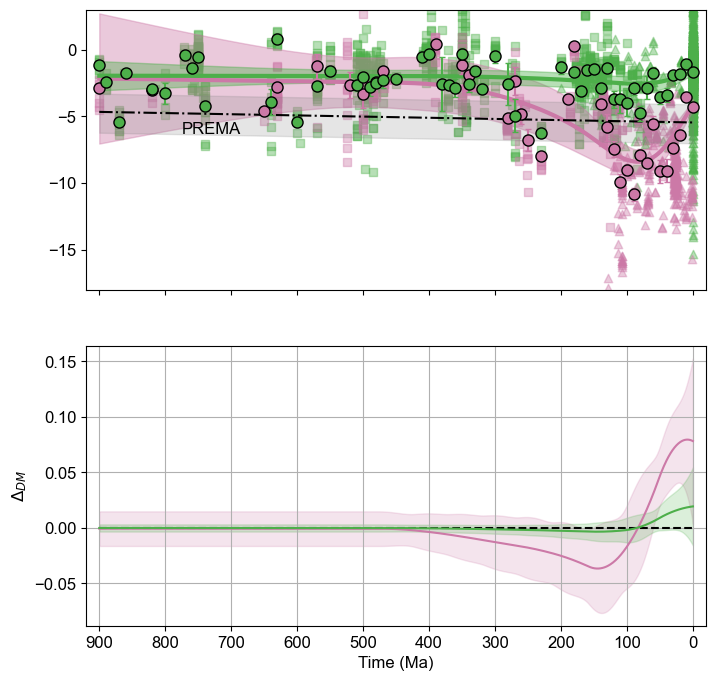

In [125]:
fig,ax = plt.subplots(2,1,figsize=(8,8),sharex=True)


#colorblind friendly colours:
yellow = "#CC79A7"
green = "#4daf4a"


#ax[0].fill_between(
#    x=[-900,0],
#    y1=[-3.33,-3.89],
#    y2=[-14,-14],
#    color="lightgray",
#    alpha=0.4   
#)


############################### Ophiolite data ###############################

ax[0].scatter(-UM_oph.Age_FromRef,
              UM_oph.Delta_DM,
              color=green,
              alpha=0.4,
              marker="s"
              )


ax[0].scatter(-OIB_oph.Age_FromRef,
              OIB_oph.Delta_DM,
              color=yellow,
              alpha=0.4,
              marker="s"
              )


############################### Current ocean data ###############################

ax[0].scatter(-CurrentOcean.loc[CurrentOcean.Type=="UM"].Age,
              CurrentOcean.loc[CurrentOcean.Type=="UM"].Delta_DM,
              color=green,
              alpha=0.4,
              marker="^"
              )

ax[0].scatter(-CurrentOcean.loc[CurrentOcean.Type=="Plume"].Age,
              CurrentOcean.loc[CurrentOcean.Type=="Plume"].Delta_DM,
              color=yellow,
              alpha=0.4,
              marker="^"
              )





############################### Data and fit ###############################

ax[0].plot(Plume_conf.Age_rounded,
           Plume_conf.fit,
           color=yellow,
           lw=3,
           label="Plume fit")

ax[0].plot(UpperMantle_conf.Age_rounded,
           UpperMantle_conf.fit,
           color=green,
           lw=3,
           label="Upper mantle fit")

ax[0].fill_between(Plume_conf.Age_rounded,
                   Plume_conf.lower,
                   Plume_conf.upper,
                   alpha=0.4,
                   color=yellow)

ax[0].fill_between(UpperMantle_conf.Age_rounded,
                   UpperMantle_conf.lower,
                   UpperMantle_conf.upper,
                   alpha=0.4,
                   color=green)

#Median PREMA
ax[0].plot(
    [-900,0],
    [-4.66266,-5.45596],
    "-.k"
)

#IQR
ax[0].fill_between(
    [-900,0],
    [-6.22549,-7.01481],
    [-3.29517,-4.09197],
    alpha=0.2,
    color="gray"
)



ax[0].annotate("PREMA",xy=(-730,-6),xycoords="data",
                va="center", ha="center",fontsize=12)






ax[0].errorbar(
    Plumes.Age_rounded,
    Plumes.Delta_DM,
    yerr=Plumes.yerr,
    fmt="o",
    ms=8,
    markeredgecolor="k",
    capsize=2.5,
    color=yellow,
    label="Plume data",
)

ax[0].errorbar(
    UpperMantle.Age_rounded,
    UpperMantle.Delta_DM,
    yerr=UpperMantle.yerr,
    fmt="o",
    ms=8,
    markeredgecolor="k",
    capsize=2.5,
    color=green,
    label="Upper mantle data",
)




############################### Plot details ###############################

ax[0].set_ylim((-18, 3))
bottom,top = ax[0].get_ylim()
#ax[0].plot([-750,-750],[bottom,top],"--k")
#ax[0].plot([-175,-175],[bottom,top],"--k")


#ax[0].fill_betweenx(
#    y=[bottom,top],
#    x1=-670,
#    x2=-480,
#    color="gray",
#    alpha=0.2
#)


#an1 = ax[0].annotate("Rodinia", xy=(-(750+900)/2, 3), xycoords="data",
#                  va="center", ha="center",fontsize=12, annotation_clip=False)
#an3 = ax[0].annotate("Gondwana\n Formation", xy=(-(670+480)/2, 3), xycoords="data",
#                  va="center", ha="center",fontsize=12, annotation_clip=False)
#an4 = ax[0].annotate("Pangea\n Formation", xy=(-(400+320)/2, 3), xycoords="data",
#                  va="center", ha="center",fontsize=12, annotation_clip=False)
#an5 = ax[0].annotate("Pangea\ndispersal", xy=(-(175+-5)/2, 3), xycoords="data",
#                  va="center", ha="center",fontsize=12, annotation_clip=False)




############################### Derivatives ###############################

ax[1].plot(   # 0 Reference line --> no change
    [-900,0],
    [0,0],
    "--k"
)


ax[1].plot(Plume_deriv_sint.Age,
           Plume_deriv_sint.est,
           color=yellow)

ax[1].fill_between(Plume_deriv_sint.Age,
                   Plume_deriv_sint.lower,
                   Plume_deriv_sint.upper,
                   alpha=0.2,
                   color=yellow)

ax[1].plot(UpperMantle_deriv_sint.Age,
           UpperMantle_deriv_sint.est,
           color=green)

ax[1].fill_between(UpperMantle_deriv_sint.Age,
                   UpperMantle_deriv_sint.lower,
                   UpperMantle_deriv_sint.upper,
                   alpha=0.2,
                   color=green)


ax[1].set(xlabel="Time (Ma)",
          ylabel="$\Delta_{DM}$")

ax[1].grid()

ax[1].set_xlim(-920, 20)
ax[1].set_xticks(np.arange(-900, 1, 100))
ax[1].set_xticklabels([str(i) for i in np.arange(0, 901, 100)[::-1]])



AttributeError: 'DataFrame' object has no attribute 'Plume'

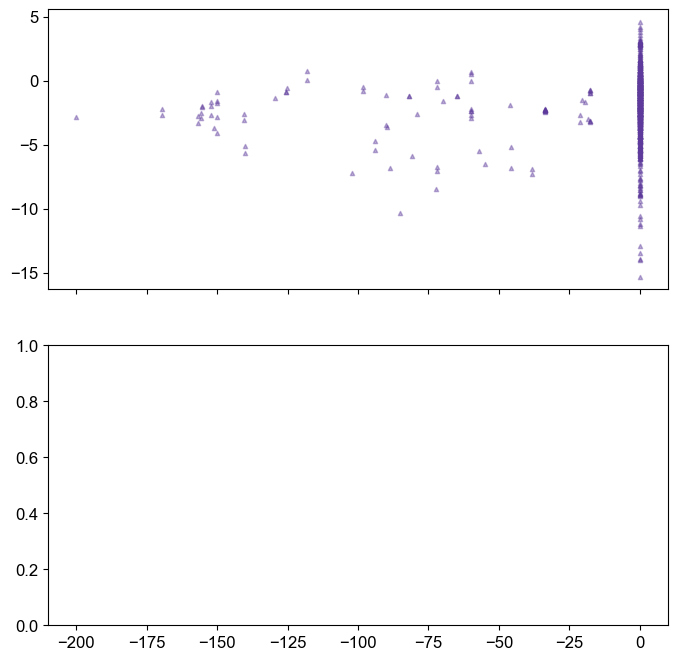

In [31]:
fig,ax = plt.subplots(2,1,figsize=(8,8),sharex=True)


#colorblind friendly colours:
pink = "#E66100"
green = "#5D3A9B"


#ax[0].fill_between(
#    x=[-900,0],
#    y1=[-3.33,-3.89],
#    y2=[-14,-14],
#    color="lightgray",
#    alpha=0.4   
#)


############################### Current ocean data ###############################

#CurrentOcean.Age = -CurrentOcean.Age
ax[0].scatter(-CurrentOcean.loc[CurrentOcean.Type=="UM"].Age,
              CurrentOcean.loc[CurrentOcean.Type=="UM"].Delta_DM,
              color=green,
              alpha=0.4,
              marker="^",
              s=9
              )

Dupal_hotspots = ["Tristan","Discovery","Shona-Meteor","Amsterdam","Kerguelen","Heard Island"]

ax[0].scatter(-AMD_OIBs.loc[~AMD_OIBs.Plume.isin(Dupal_hotspots)].Age,
              AMD_OIBs.loc[~AMD_OIBs.Plume.isin(Dupal_hotspots)].Delta_DM,
              color=pink,
              alpha=0.4,
              marker="^",
              s=9
              )

sns.scatterplot(x=-AMD_OIBs.loc[AMD_OIBs.Plume.isin(Dupal_hotspots)].Age,
              y=AMD_OIBs.loc[AMD_OIBs.Plume.isin(Dupal_hotspots)].Delta_DM,
              color="yellow",
              alpha=0.4,
              style=AMD_OIBs.loc[AMD_OIBs.Plume.isin(Dupal_hotspots)].Plume,
              markers=["v","P","D","X","h"],
              ax=ax[0],
              edgecolor="black",
              s=9
              )

#sns.kdeplot(
#    data=CurrentOcean.loc[CurrentOcean.Type=="UM"],
#    x="Age",
#    y="Delta_DM",
#    levels=10,
#    color=green,
#    cut=0,
#    fill=True,
#    alpha=0.5,
#    ax=ax[0]
#)
#sns.kdeplot(
#    data=CurrentOcean.loc[CurrentOcean.Type=="Plume"],
#    x="Age",
#    y="Delta_DM",
#    levels=10,
#    color=pink,
#    cut=0,
#    fill=True,
#    alpha=0.5,
#    ax=ax[0]
#)




############################### Ophiolite data ###############################

ax[0].scatter(-UM_oph.Age_FromRef,
              UM_oph.Delta_DM,
              color=green,
              alpha=0.4,
              marker="s",
              s=9
              )


ax[0].scatter(-OIB_oph.Age_FromRef,
              OIB_oph.Delta_DM,
              color=pink,
              alpha=0.4,
              marker="s",
              s=9
              )








############################### Data and fit ###############################

ax[0].plot(Plume_conf.Age_rounded,
           Plume_conf.fit,
           color=pink,
           lw=3,
           label="Plume fit")

ax[0].plot(UpperMantle_conf.Age_rounded,
           UpperMantle_conf.fit,
           color=green,
           lw=3,
           label="Upper mantle fit")

ax[0].fill_between(Plume_conf.Age_rounded,
                   Plume_conf.lower,
                   Plume_conf.upper,
                   alpha=0.4,
                   color=pink)

ax[0].fill_between(UpperMantle_conf.Age_rounded,
                   UpperMantle_conf.lower,
                   UpperMantle_conf.upper,
                   alpha=0.4,
                   color=green)


ax[0].errorbar(
    Plumes.Age_rounded,
    Plumes.Delta_DM,
    yerr=Plumes.yerr,
    fmt="o",
    ms=6,
    markeredgecolor="k",
    capsize=2.5,
    color=pink,
    label="Plume data",
)

ax[0].errorbar(
    UpperMantle.Age_rounded,
    UpperMantle.Delta_DM,
    yerr=UpperMantle.yerr,
    fmt="o",
    ms=6,
    markeredgecolor="k",
    capsize=2.5,
    color=green,
    label="Upper mantle data",
)


#Median PREMA
ax[0].plot(
    [-900,0],
    [-4.66266,-5.45596],
    "-.k"
)

#IQR
ax[0].fill_between(
    [-900,0],
    [-6.22549,-7.01481],
    [-3.29517,-4.09197],
    alpha=0.2,
    color="gray"
)



ax[0].annotate("PREMA",xy=(-730,-6),xycoords="data",
                va="center", ha="center",fontsize=12)


############################### Plot details ###############################


############################### Derivatives ###############################



#ax[1].errorbar(x=Resampled_Plume.Age_rounded,
#            y=Resampled_Plume.fit,
#            yerr=Resampled_Plume["se.fit"],
#            fmt="-s",
#            markeredgecolor="k",
#            capsize=2.5,
#            color=pink
#           )

#ax[1].errorbar(x=Resampled_UM.Age_rounded,
#            y=Resampled_UM.fit,
#            yerr=Resampled_UM["se.fit"],
#            fmt="-s",
#            markeredgecolor="k",
#            capsize=2.5,
#            color=green
#           )





Rounding_bin = 100
Plumes["New_Age"]=((Plumes.Age_rounded/Rounding_bin).round(0))*Rounding_bin
UpperMantle["New_Age"]=((UpperMantle.Age_rounded/Rounding_bin).round(0))*Rounding_bin

ax[1].errorbar(x=Plumes.groupby("New_Age")["New_Age"].unique(),
               y=Plumes.groupby("New_Age")["Delta_DM"].mean(),
               yerr=Plumes.groupby("New_Age")["Delta_DM"].std(),
               fmt="-o",
               capsize=2.5,
               color=pink,
               markeredgecolor="k",
               markersize=9
               
)

ax[1].errorbar(x=UpperMantle.groupby("New_Age")["New_Age"].unique(),
               y=UpperMantle.groupby("New_Age")["Delta_DM"].mean(),
               yerr=UpperMantle.groupby("New_Age")["Delta_DM"].std(),
               fmt="-o",
               capsize=2.5,
               color=green,
               markeredgecolor="k",
               markersize=9
               
)


#Median PREMA
ax[1].plot(
    [-900,0],
    [-4.07659,-4.8714],
    "-.k"
)

#IQR
ax[1].fill_between(
    [-900,0],
    [-6.87017,-7.65783],
    [-1.28302,-2.08496],
    alpha=0.2,
    color="gray"
)



ax[1].annotate("PREMA",xy=(-730,-6),xycoords="data",
                va="center", ha="center",fontsize=12)

############################### Plot settings ###############################

ax[0].set(ylabel="$\Delta_{DM}$")


#h, l = ax[0].get_legend_handles_labels()
#order = [2, 0, 3, 1]
#h = [h[i] for i in order]
#l = [l[i] for i in order]
#ax[0].legend(h, l, loc="lower left",ncols=2)





ax[1].set(xlabel="Time (Ma)",
          ylabel="$\Delta_{DM}$")

ax[1].set_xlim(-920, 20)
ax[1].set_xticks(np.arange(-900, 1, 100))
ax[1].set_xticklabels([str(i) for i in np.arange(0, 901, 100)[::-1]])
ax[0].axhline(y=-11.6,ls=":",color="blue")
h,l = ax[0].get_legend_handles_labels()
ax[0].legend(h[:5],l[:5],title="Dupal Plumes",ncols=2,fontsize=8)

geoTime(ax[1])



ax3 = fig.add_axes((0.98,0.543,0.2,0.435))


ax3 = sns.histplot(data=AMD_OIBs.loc[AMD_OIBs.Age_rounded==0.],y="Delta_DM",stat="count",color="gray",legend=False)
ax3.axhline(y=AMD_OIBs.loc[AMD_OIBs.Age_rounded==0.].Delta_DM.quantile(0.25),color="k")
ax3.axhline(y=AMD_OIBs.loc[AMD_OIBs.Age_rounded==0.].Delta_DM.quantile(0.75),color="k")
ax3.axhline(y=AMD_OIBs.loc[AMD_OIBs.Age_rounded==0.].Delta_DM.median(),color="k",ls="--")


ax3.set_ylim(-18,2)
for s in ax3.spines:
    ax3.spines[s].set_visible(False)


ax3.set(xlabel="",ylabel="")



ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)



plt.tight_layout()
savedir = "C:\\Users\\21002223\\OneDrive - Curtin University of Technology Australia\\Papers\\Paper 1\\Figures"
#fig.savefig(savedir+"\\GAMs_R_v4_scatter.svg",dpi=300)

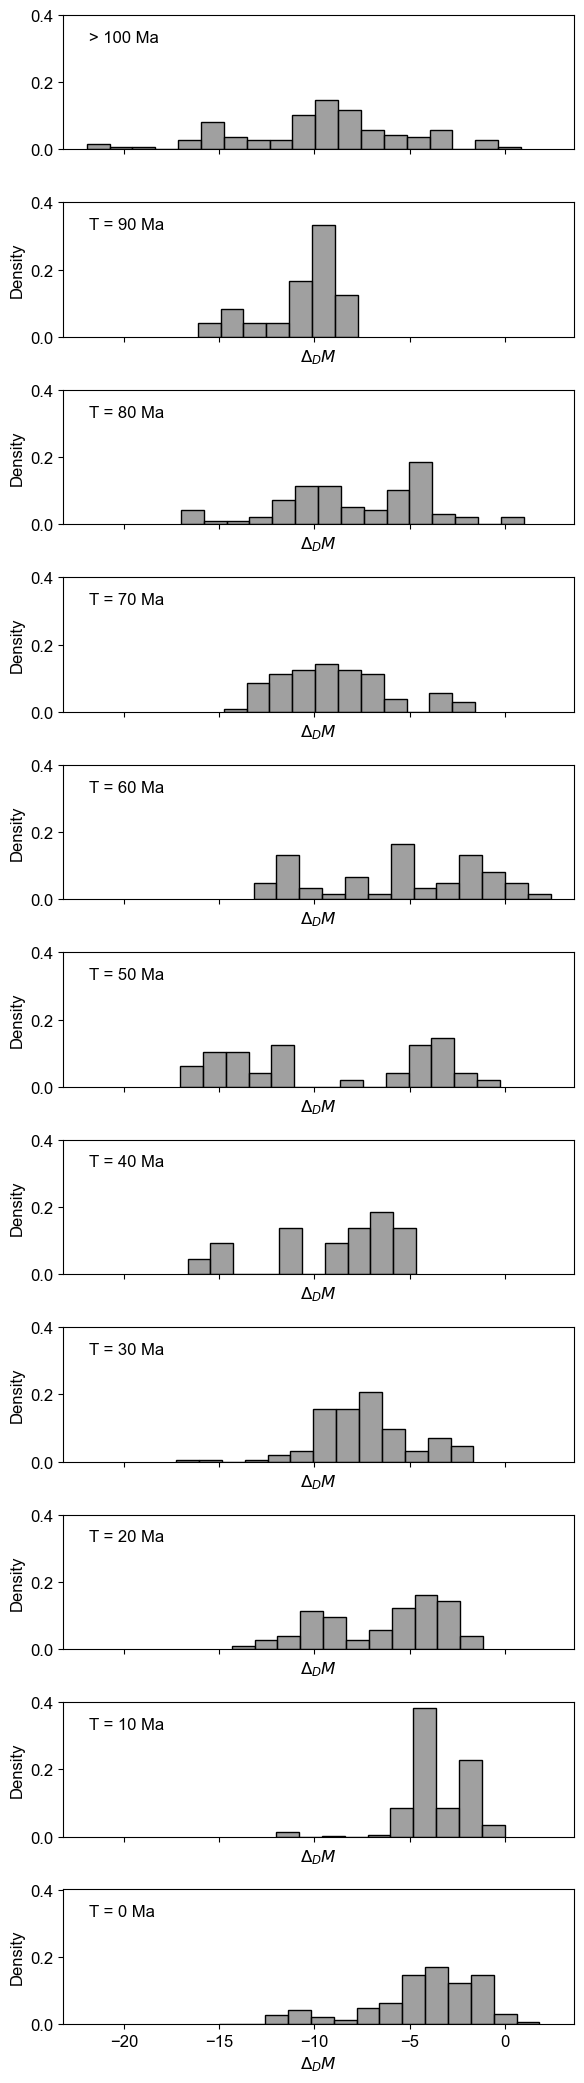

In [87]:
fig, ax = plt.subplots(11,1,figsize=(6,21),sharex=True,sharey=True)

sns.histplot(AMD_OIBs.loc[AMD_OIBs.Age_rounded>=100].Delta_DM,color="gray",stat="density",binwidth=1.2,ax=ax[0])
ax[0].annotate("> 100 Ma",xy=(0.05,0.8),xycoords="axes fraction")

for a in ax.flatten():
    a.set_ylabel("")
    a.set_xlabel("$\Delta_DM$")

for a,t in zip(ax.flatten()[1:],np.arange(0,91,10)[::-1]):
    sns.histplot(AMD_OIBs.loc[AMD_OIBs.Age_rounded==t].Delta_DM,color="gray",stat="density",binwidth=1.2,ax=a)
    a.annotate(f"T = {str(t)} Ma",xy=(0.05,0.8),xycoords="axes fraction")
    
fig.tight_layout()

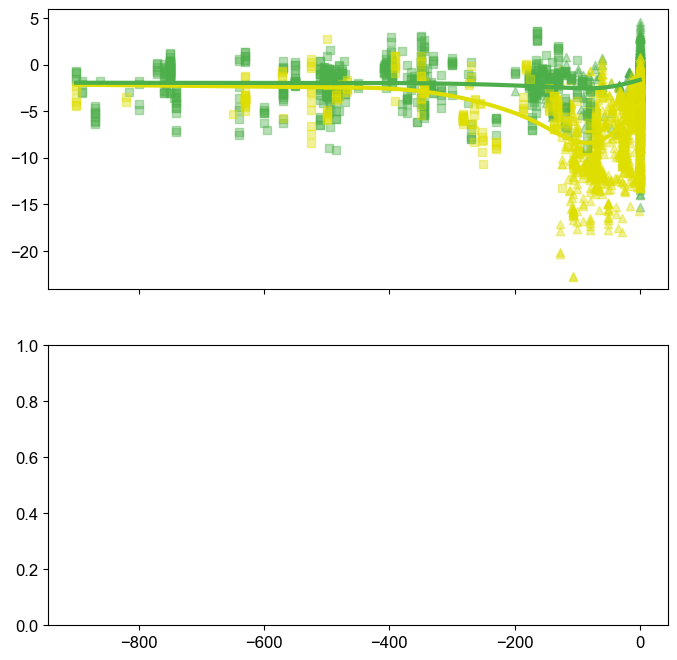

In [127]:
fig,ax = plt.subplots(2,1,figsize=(8,8),sharex=True)


#colorblind friendly colours:
yellow = "#dede00" 
green = "#4daf4a"


#ax[0].fill_between(
#    x=[-900,0],
#    y1=[-3.33,-3.89],
#    y2=[-14,-14],
#    color="lightgray",
#    alpha=0.4   
#)


############################### Current ocean data ###############################

#CurrentOcean.Age = -CurrentOcean.Age
ax[0].scatter(-CurrentOcean.loc[CurrentOcean.Type=="UM"].Age,
              CurrentOcean.loc[CurrentOcean.Type=="UM"].Delta_DM,
              color=green,
              alpha=0.4,
              marker="^"
              )

ax[0].scatter(-AMD_OIBs.Age,
              AMD_OIBs.Delta_DM,
              color=yellow,
              alpha=0.4,
              marker="^"
              )

#sns.kdeplot(
#    data=CurrentOcean.loc[CurrentOcean.Type=="UM"],
#    x="Age",
#    y="Delta_DM",
#    levels=10,
#    color=green,
#    cut=0,
#    fill=True,
#    alpha=0.5,
#    ax=ax[0]
#)
#sns.kdeplot(
#    data=CurrentOcean.loc[CurrentOcean.Type=="Plume"],
#    x="Age",
#    y="Delta_DM",
#    levels=10,
#    color=yellow,
#    cut=0,
#    fill=True,
#    alpha=0.5,
#    ax=ax[0]
#)




############################### Ophiolite data ###############################

ax[0].scatter(-UM_oph.Age_FromRef,
              UM_oph.Delta_DM,
              color=green,
              alpha=0.4,
              marker="s"
              )


ax[0].scatter(-OIB_oph.Age_FromRef,
              OIB_oph.Delta_DM,
              color=yellow,
              alpha=0.4,
              marker="s"
              )








############################### Data and fit ###############################

ax[0].plot(Plume_conf.Age_rounded,
           Plume_conf.fit,
           color=yellow,
           lw=3,
           label="Plume fit")

ax[0].plot(UpperMantle_conf.Age_rounded,
           UpperMantle_conf.fit,
           color=green,
           lw=3,
           label="Upper mantle fit")

<Axes: xlabel='iso87Sr86Sr', ylabel='Delta_DM'>

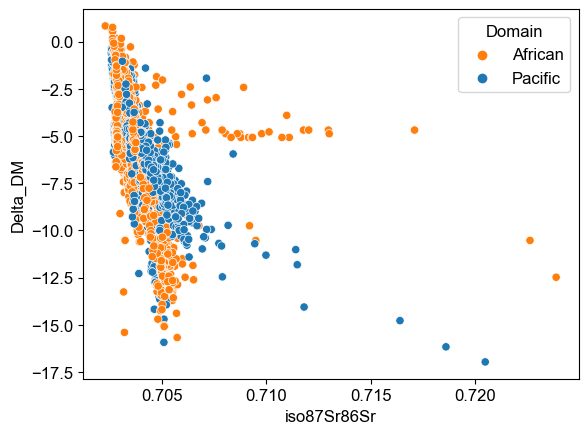

In [69]:
sns.scatterplot(data=OIB,x="iso87Sr86Sr",y="Delta_DM",hue="Domain",palette=["tab:orange","tab:blue"])

In [ ]:
Rounding_bin = 100
Plumes["New_Age"]=((Plumes.Age_rounded/Rounding_bin).round(0))*Rounding_bin
plt.errorbar(x=Plumes.groupby("New_Age")["New_Age"].unique(),
             y=Plumes.groupby("New_Age")["Delta_DM"].mean(),
             yerr=Plumes.groupby("New_Age")["Delta_DM"].std(),
             fmt="-o",
             capsize=2.5            
)

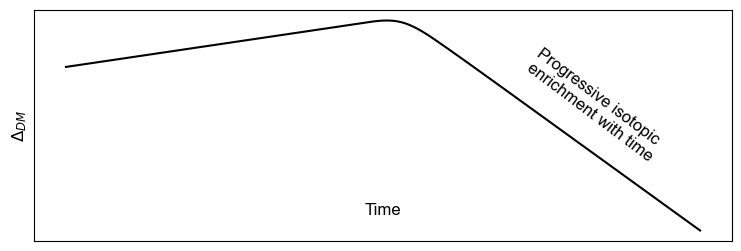

In [91]:
fig,ax = plt.subplots(figsize=(9,3),sharex=True)

ax.plot(Plume_conf.Age_rounded,
           Plume_conf.fit,
           color="black"
           )





ax.annotate("Time",xy=(-450,-9),rotation=0,ha="center")
ax.annotate("Progressive isotopic \nenrichment with time",
            xy=(-250,-7.2),rotation=-37)




ax.set(ylabel="$\Delta_{DM}$")
ax.set_yticks([])
ax.set_xticks([])

fig.savefig(savedir+"\\Curve_Template_Fig3.svg")

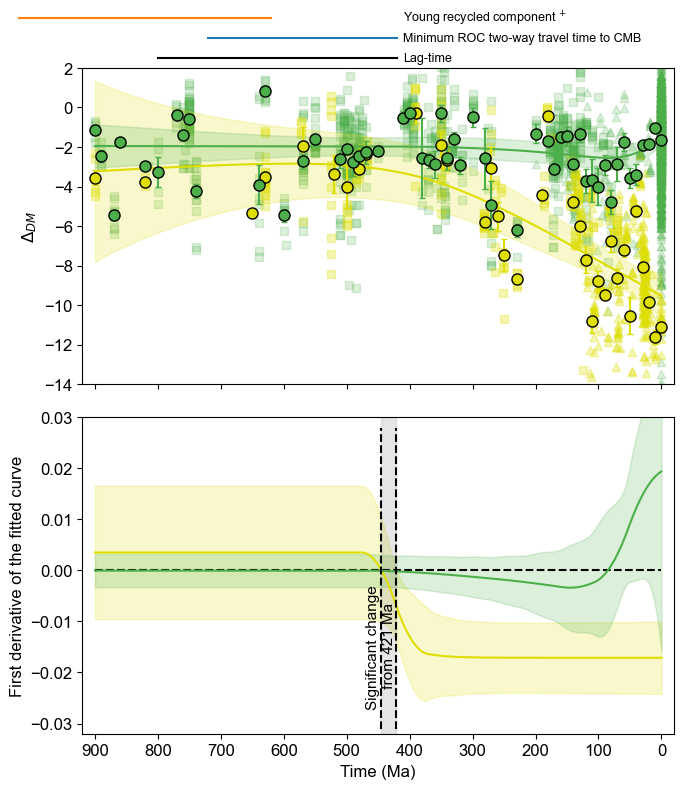

In [12]:
################################## VERSION 2 ##################################
fig,ax = plt.subplots(2,1,figsize=(7,8),sharex=True)


#colorblind friendly colours:
yellow = "#dede00" 
green = "#4daf4a"

############################### Ophiolite data ###############################

ax[0].scatter(-UM_oph.Age_FromRef,
              UM_oph.Delta_DM,
              color=green,
              alpha=0.2,
              marker="s"
              )


ax[0].scatter(-OIB_oph.Age_FromRef,
              OIB_oph.Delta_DM,
              color=yellow,
              alpha=0.3,
              marker="s"
              )


############################### Current ocean data ###############################

ax[0].scatter(-CurrentOcean.loc[CurrentOcean.Type=="UM"].Age,
              CurrentOcean.loc[CurrentOcean.Type=="UM"].Delta_DM,
              color=green,
              alpha=0.2,
              marker="^"
              )

ax[0].scatter(-CurrentOcean.loc[CurrentOcean.Type=="Plume"].Age,
              CurrentOcean.loc[CurrentOcean.Type=="Plume"].Delta_DM,
              color=yellow,
              alpha=0.3,
              marker="^"
              )





############################### Data and fit ###############################

ax[0].plot(Plume_conf.Age_rounded,
           Plume_conf.fit,
           color=yellow,
           label="Plume fit")

ax[0].plot(UpperMantle_conf.Age_rounded,
           UpperMantle_conf.fit,
           color=green,
           label="Upper mantle fit")

ax[0].fill_between(Plume_conf.Age_rounded,
                   Plume_conf.lower,
                   Plume_conf.upper,
                   alpha=0.2,
                   color=yellow)

ax[0].fill_between(UpperMantle_conf.Age_rounded,
                   UpperMantle_conf.lower,
                   UpperMantle_conf.upper,
                   alpha=0.2,
                   color=green)

ax[0].errorbar(
    Plumes.Age_rounded,
    Plumes.Delta_DM,
    yerr=Plumes.yerr,
    fmt="o",
    ms=8,
    markeredgecolor="k",
    capsize=2.5,
    color=yellow,
    label="Plume data",
)

ax[0].errorbar(
    UpperMantle.Age_rounded,
    UpperMantle.Delta_DM,
    yerr=UpperMantle.yerr,
    fmt="o",
    ms=8,
    markeredgecolor="k",
    capsize=2.5,
    color=green,
    label="Upper mantle data",
)


############################### Plot details ###############################

ax[0].set_ylim((-14, 2))
bottom,top = ax[0].get_ylim()


#ax[0].fill_betweenx(
#    y=[bottom,top],
#    x1=-670,
#    x2=-480,
#    color="gray",
#    alpha=0.2
#)

# Difference between Gondwana related subduction and start of enriched signal
ax[0].plot([-800,-420],
           [2.5,2.5],clip_on=False,
           color="k")
ax[0].annotate("Lag-time",xy=(-410,2.5),xycoords="data"
               ,va="center",ha="left", fontsize=9,annotation_clip=False)

# ROC two-way travel time 
ax[0].plot([-720,-420],
           [3.5,3.5],clip_on=False)
ax[0].annotate("Minimum ROC two-way travel time to CMB",xy=(-410,3.5),xycoords="data"
               ,va="center",ha="left", fontsize=9,annotation_clip=False)

# Estimated age for young recycled component in Hawaii (Sobolev et al. 2011)
ax[0].plot([-1020,-620],
           [4.5,4.5],clip_on=False)
ax[0].annotate("Young recycled component $^{+}$",xy=(-410,4.5),xycoords="data"
               ,va="center",ha="left", fontsize=9,annotation_clip=False)


############################### Derivatives ###############################

ax[1].plot(   # 0 Reference line --> no change
    [-900,0],
    [0,0],
    "--k"
)


ax[1].plot(Plume_deriv_sint_ad.Age,
           Plume_deriv_sint_ad.est,
           color=yellow)

ax[1].fill_between(Plume_deriv_sint_ad.Age,
                   Plume_deriv_sint_ad.lower,
                   Plume_deriv_sint_ad.upper,
                   alpha=0.2,
                   color=yellow)

ax[1].plot(UpperMantle_deriv_sint.Age,
           UpperMantle_deriv_sint.est,
           color=green)

ax[1].fill_between(UpperMantle_deriv_sint.Age,
                   UpperMantle_deriv_sint.lower,
                   UpperMantle_deriv_sint.upper,
                   alpha=0.2,
                   color=green)


ax[1].plot(
    [TippingAge_ad,TippingAge_ad],
    [-0.031,0.028],
    "--k"
)
ax[1].plot(
    [TippingAge_ad_center,TippingAge_ad_center],
    [-0.031,0.028],
    "--k"
)



ax[1].fill_betweenx(
    y=[bottom,top],
    x1=TippingAge_ad_center,
    x2=TippingAge_ad,
    color="gray",
    alpha=0.2
)



an5 = ax[1].annotate("Significant change\n from 421 Ma", xy=(-445, -0.015), xycoords="data",
                  va="center", ha="center",fontsize=11, rotation=90)

############################### Plot settings ###############################

ax[0].set(ylabel="$\Delta_{DM}$")





ax[1].set(xlabel="Time (Ma)",
          ylabel="First derivative of the fitted curve")

ax[1].set_xlim(-920, 20)
ax[1].set_ylim(-0.032,0.03)
ax[1].set_xticks(np.arange(-900, 1, 100))
ax[1].set_xticklabels([str(i) for i in np.arange(0, 901, 100)[::-1]])

plt.tight_layout()
#savedir = "C:\\Users\\21002223\\OneDrive - Curtin University of Technology Australia\\Papers\\Paper 1\\Figures"
#fig.savefig(savedir+"\\GAMs_R_2.png",dpi=300)

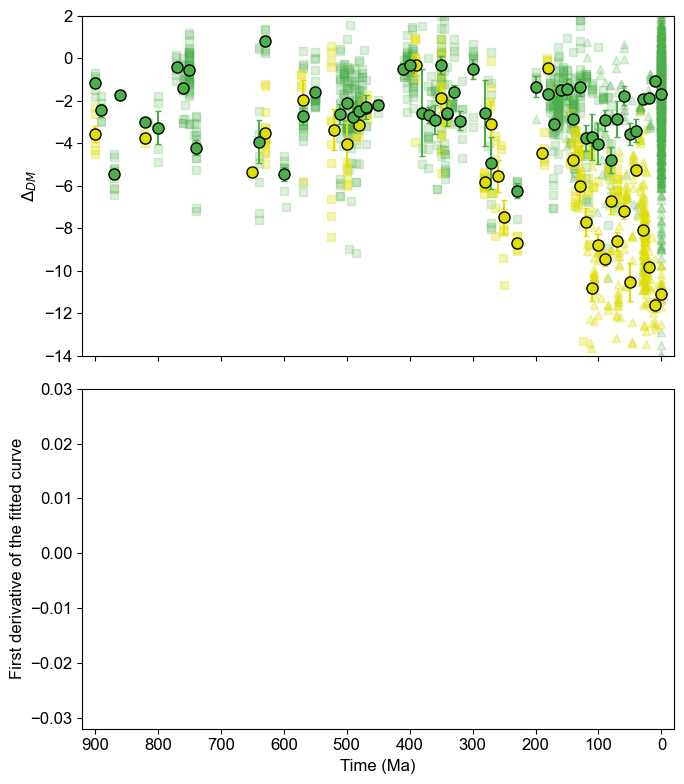

In [166]:
################################## VERSION 2 ##################################
fig,ax = plt.subplots(2,1,figsize=(7,8),sharex=True)


#colorblind friendly colours:
yellow = "#dede00" 
green = "#4daf4a"

############################### Ophiolite data ###############################

ax[0].scatter(-UM_oph.Age_FromRef,
              UM_oph.Delta_DM,
              color=green,
              alpha=0.2,
              marker="s"
              )


ax[0].scatter(-OIB_oph.Age_FromRef,
              OIB_oph.Delta_DM,
              color=yellow,
              alpha=0.3,
              marker="s"
              )


############################### Current ocean data ###############################

ax[0].scatter(-CurrentOcean.loc[CurrentOcean.Type=="UM"].Age,
              CurrentOcean.loc[CurrentOcean.Type=="UM"].Delta_DM,
              color=green,
              alpha=0.2,
              marker="^"
              )

ax[0].scatter(-CurrentOcean.loc[CurrentOcean.Type=="Plume"].Age,
              CurrentOcean.loc[CurrentOcean.Type=="Plume"].Delta_DM,
              color=yellow,
              alpha=0.3,
              marker="^"
              )





############################### Data and fit ###############################


ax[0].errorbar(
    Plumes.Age_rounded,
    Plumes.Delta_DM,
    yerr=Plumes.yerr,
    fmt="o",
    ms=8,
    markeredgecolor="k",
    capsize=2.5,
    color=yellow,
    label="Plume data",
)

ax[0].errorbar(
    UpperMantle.Age_rounded,
    UpperMantle.Delta_DM,
    yerr=UpperMantle.yerr,
    fmt="o",
    ms=8,
    markeredgecolor="k",
    capsize=2.5,
    color=green,
    label="Upper mantle data",
)


############################### Plot settings ###############################

ax[0].set(ylabel="$\Delta_{DM}$")
ax[0].set_ylim((-14, 2))





ax[1].set(xlabel="Time (Ma)",
          ylabel="First derivative of the fitted curve")

ax[1].set_xlim(-920, 20)
ax[1].set_ylim(-0.032,0.03)
ax[1].set_xticks(np.arange(-900, 1, 100))
ax[1].set_xticklabels([str(i) for i in np.arange(0, 901, 100)[::-1]])

plt.tight_layout()
savedir = "C:\\Users\\21002223\\OneDrive - Curtin University of Technology Australia\\Papers\\Paper 1\\Figures"
fig.savefig(savedir+"\\OnlyScatter.png",dpi=300)

# Mixing Model

In [54]:
loc = r"C:\Users\21002223\OneDrive - Curtin University of Technology Australia\Papers\Paper 1"
df = pd.read_excel(loc+"\\Contaminant_Modelling.xlsx",sheet_name="Reservoirs")
PREMA = df.loc[df.Reservoir=="PREMA"]
GLOSS = df.loc[df.Reservoir=="GLOSS"]
DM = df.loc[df.Reservoir=="DM"]
MORB = df.loc[df.Reservoir=="Average MORB"]






def non_isotope_mix(Res1,Res2,r):
    C1,C2 = Res1["Nd"].values,Res2["Nd"].values
    return C1*r+C2*(1-r)


def Nd_mixing(Res1,Res2,f):
    C1,C2 = Res1["Nd"].values,Res2["Nd"].values
    I1,I2 = Res1["143Nd/144Nd"].values,Res2["143Nd/144Nd"].values

    
    Num = I1*C1*f + I2*C2*(1-f)
    Denom = C1*f + C2*(1-f)
    
    Im = Num/Denom
    return Im


def Sm_mixing(Res1,Res2,f):
    C1,C2 = Res1["Sm"].values,Res2["Sm"].values
    I1,I2 = Res1["147Sm/144Nd"].values,Res2["147Sm/144Nd"].values

    
    Num = I1*C1*f + I2*C2*(1-f)
    Denom = C1*f + C2*(1-f)
    
    Im = Num/Denom
    return Im

def Nd_evol(Sm_isotope,Nd_isotope,time):
    tt = time*1e6
    lbd_Nd = 6.54e-12 #Lugmair and Marti 1978
    
    Nd143 = Nd_isotope + Sm_isotope*(np.exp(lbd_Nd*tt)-1)
    
    return Nd143
    

ROC_10_Nd_iso = Nd_mixing(GLOSS.loc[GLOSS["T"]==700],MORB.loc[MORB["T"]==700],0.1)
ROC_10_Sm = Sm_mixing(GLOSS.loc[GLOSS["T"]==700],MORB.loc[MORB["T"]==700],0.1)
ROC_10_Nd = non_isotope_mix(GLOSS.loc[GLOSS["T"]==700],MORB.loc[MORB["T"]==700],0.1)

ROC_10 = np.array([ROC_10_Sm[0],ROC_10_Nd_iso[0]])

ROC_10 = Nd_evol(ROC_10[0],ROC_10[1],np.arange(0,701,100))

ROC_10 = pd.DataFrame({
    "Nd":np.full(len(ROC_10),ROC_10_Nd),
    "143Nd/144Nd":ROC_10
    },
    index=np.arange(0,701,100)[::-1]
)


F = np.array([0.0,0.01,0.02,0.03,0.04,0.05,0.1,0.2,1])


PREMA_ROC_Mix = []
for i,f in enumerate(F):
    PREMA_ROC_Mix.append(Nd_mixing(ROC_10,PREMA.loc[PREMA["T"]<=700],f))
    #print(i,f)
A = dict(zip(F,PREMA_ROC_Mix))

PREMA_ROC_Mix = pd.DataFrame(A)
PREMA_ROC_Mix.rename(dict(zip(PREMA_ROC_Mix.index,np.arange(0,1001,100))),axis=0,inplace=True)

Nd_iso_DM = DM.loc[DM["T"]<=700,"143Nd/144Nd"].values

PREMA_ROC_Mix_DM = PREMA_ROC_Mix.copy()

for col in PREMA_ROC_Mix_DM:
    PREMA_ROC_Mix_DM[col] = ((PREMA_ROC_Mix_DM[col].values/Nd_iso_DM)-1)*1e4
    
PREMA_ROC_Mix_DM = PREMA_ROC_Mix_DM.T



PREMA_GLOSS_Mix = []
for i,f in enumerate(F):
    PREMA_GLOSS_Mix.append(Nd_mixing(GLOSS,PREMA,f))
    #print(i,f)
A = dict(zip(F,PREMA_GLOSS_Mix))

PREMA_GLOSS_Mix = pd.DataFrame(A)
PREMA_GLOSS_Mix.rename(dict(zip(PREMA_GLOSS_Mix.index,np.arange(0,1001,100))),axis=0,inplace=True)

Nd_iso_DM = DM.loc[DM["T"]<=1000,"143Nd/144Nd"].values

PREMA_GLOSS_Mix_DM = PREMA_GLOSS_Mix.copy()

for col in PREMA_GLOSS_Mix_DM:
    PREMA_GLOSS_Mix_DM[col] = ((PREMA_GLOSS_Mix_DM[col].values/Nd_iso_DM)-1)*1e4
    
PREMA_GLOSS_Mix_DM = PREMA_GLOSS_Mix_DM.T

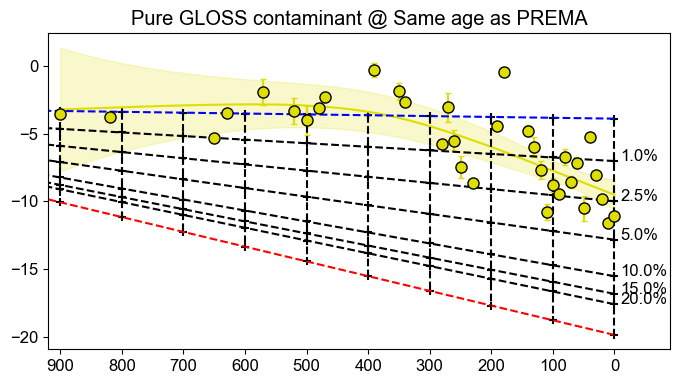

In [48]:
################################## VERSION 2 ##################################
fig,ax = plt.subplots(figsize=(7,4))


#colorblind friendly colours:
yellow = "#dede00" 
green = "#4daf4a"

############################### Data and fit ###############################

ax.plot(Plume_conf.Age_rounded,
           Plume_conf.fit,
           color=yellow,
           label="Plume fit")


ax.fill_between(Plume_conf.Age_rounded,
                   Plume_conf.lower,
                   Plume_conf.upper,
                   alpha=0.2,
                   color=yellow)


ax.errorbar(
    Plumes.Age_rounded,
    Plumes.Delta_DM,
    yerr=Plumes.yerr,
    fmt="o",
    ms=8,
    markeredgecolor="k",
    capsize=2.5,
    color=yellow,
    label="Plume data",
)



ax.plot(-PREMA["T"],PREMA["Delta_DM"],"--b")
ax.plot(-GLOSS["T"],GLOSS["Delta_DM"],"--r")


for col in PREMA_GLOSS_Mix_DM.columns:
    ax.scatter(-np.full(len(PREMA_GLOSS_Mix_DM),int(col)),
               PREMA_GLOSS_Mix_DM[col],
               marker="+",color="k"
              )
    ax.plot(-np.full(len(PREMA_GLOSS_Mix_DM),int(col)),
            PREMA_GLOSS_Mix_DM[col],
            "--k"
            )
for row in PREMA_GLOSS_Mix_DM.iterrows():
    if row[0] != 0.0 and row[0] != 1:
        ax.plot([-int(col) for col in PREMA_GLOSS_Mix_DM.columns],
                row[1],"--k")




############################### Plot details ###############################

#ax.set_ylim((-14, 2))
bottom,top = ax.get_ylim()
ax.set_xlim(-920, 90)
ax.set_xticks(np.arange(-900, 1, 100))
ax.set_xticklabels([str(i) for i in np.arange(0, 901, 100)[::-1]])

#ax.fill_betweenx(
#    y=[bottom,top],
#    x1=-670,
#    x2=-480,
#    color="gray",
#    alpha=0.2
#)

# Difference between Gondwana related subduction and start of enriched signal

for y,f in zip(PREMA_GLOSS_Mix_DM[0],PREMA_GLOSS_Mix_DM.index):
    if f!=0.0 and f!=1:
        ax.annotate(f"{f*100}%",(10,y))

ax.set_title("Pure GLOSS contaminant @ Same age as PREMA")

plt.tight_layout()
#savedir = "C:\\Users\\21002223\\OneDrive - Curtin University of Technology Australia\\Papers\\Paper 1\\Figures"
#fig.savefig(savedir+"\\GAMs_R_3.png",dpi=300)

In [102]:
Evols= pd.read_clipboard()

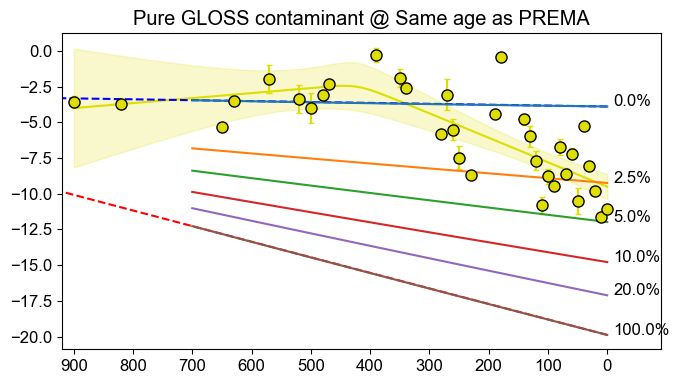

In [112]:

################################## VERSION 2 ##################################
fig,ax = plt.subplots(figsize=(7,4))


#colorblind friendly colours:
yellow = "#dede00" 
green = "#4daf4a"

############################### Data and fit ###############################

ax.plot(Plume_conf.Age_rounded,
           Plume_conf.fit,
           color=yellow,
           label="Plume fit")


ax.fill_between(Plume_conf.Age_rounded,
                   Plume_conf.lower,
                   Plume_conf.upper,
                   alpha=0.2,
                   color=yellow)


ax.errorbar(
    Plumes.Age_rounded,
    Plumes.Delta_DM,
    yerr=Plumes.yerr,
    fmt="o",
    ms=8,
    markeredgecolor="k",
    capsize=2.5,
    color=yellow,
    label="Plume data",
)



ax.plot(-PREMA["T"],PREMA["Delta_DM"],"--b")
ax.plot(-GLOSS["T"],GLOSS["Delta_DM"],"--r")


for c in Evols:
    ax.plot(-Evols.index,Evols[c])



############################### Plot details ###############################

#ax.set_ylim((-14, 2))
bottom,top = ax.get_ylim()
ax.set_xlim(-920, 90)
ax.set_xticks(np.arange(-900, 1, 100))
ax.set_xticklabels([str(i) for i in np.arange(0, 901, 100)[::-1]])


for y,f in zip(Evols.iloc[0],Evols.columns):
    if f!=0.0 and f!=1:
        ax.annotate(f"{float(f)*100}%",(10,y))

ax.set_title("Pure GLOSS contaminant @ Same age as PREMA")

plt.tight_layout()

In [107]:
Evols

,0.0,0.025,0.05,0.1,0.2,1.0
0,-3.897116,-9.245384,-11.975684,-14.781655,-17.104701,-19.875292
100,-3.844957,-8.910216,-11.473416,-14.090876,-16.244794,-18.798283
200,-3.789217,-8.571499,-10.967619,-13.396588,-15.381397,-17.717808
300,-3.729894,-8.229230,-10.458288,-12.698787,-14.514507,-16.633862
400,-3.666986,-7.883407,-9.945421,-11.997470,-13.644118,-15.546441
500,-3.600488,-7.534025,-9.429014,-11.292634,-12.770228,-14.455543
600,-3.530398,-7.181082,-8.909064,-10.584274,-11.892832,-13.361162
700,-3.456714,-6.824574,-8.385566,-9.872388,-11.011928,-12.263296


In [81]:
PREMA_RH_MIX_DM = pd.read_clipboard()
PREMA_RH_MIX_DM = PREMA_RH_MIX_DM.T

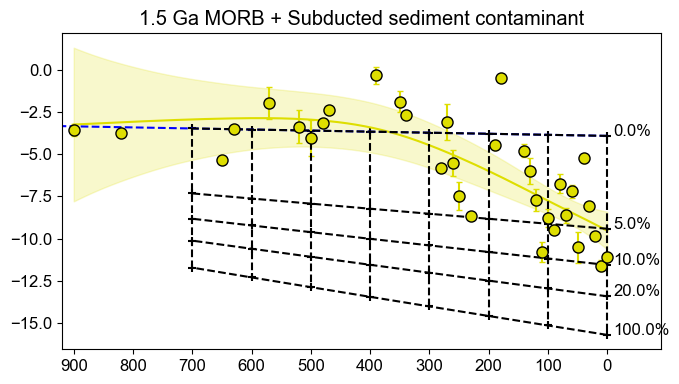

In [84]:
################################## VERSION 2 ##################################
fig,ax = plt.subplots(figsize=(7,4))


#colorblind friendly colours:
yellow = "#dede00" 
green = "#4daf4a"

############################### Data and fit ###############################

ax.plot(Plume_conf.Age_rounded,
           Plume_conf.fit,
           color=yellow,
           label="Plume fit")


ax.fill_between(Plume_conf.Age_rounded,
                   Plume_conf.lower,
                   Plume_conf.upper,
                   alpha=0.2,
                   color=yellow)


ax.errorbar(
    Plumes.Age_rounded,
    Plumes.Delta_DM,
    yerr=Plumes.yerr,
    fmt="o",
    ms=8,
    markeredgecolor="k",
    capsize=2.5,
    color=yellow,
    label="Plume data",
)



ax.plot(-PREMA["T"],PREMA["Delta_DM"],"--b")
#ax.plot(-GLOSS["T"],GLOSS["Delta_DM"],"--r")


for col in PREMA_ROC_Mix_DM.columns:
    ax.scatter(-np.full(len(PREMA_ROC_MIX_DM),int(col)),
               PREMA_ROC_MIX_DM[col],
               marker="+",color="k"
              )
    ax.plot(-np.full(len(PREMA_ROC_MIX_DM),int(col)),
            PREMA_ROC_MIX_DM[col],
            "--k"
            )
for row in PREMA_ROC_MIX_DM.iterrows():
    if row[0] != 0.0 and row[0] != 1:
        ax.plot([-int(col) for col in PREMA_ROC_MIX_DM.columns],
                row[1],"--k")




############################### Plot details ###############################

#ax.set_ylim((-14, 2))
bottom,top = ax.get_ylim()
ax.set_xlim(-920, 90)
ax.set_xticks(np.arange(-900, 1, 100))
ax.set_xticklabels([str(i) for i in np.arange(0, 901, 100)[::-1]])

#ax.fill_betweenx(
#    y=[bottom,top],
#    x1=-670,
#    x2=-480,
#    color="gray",
#    alpha=0.2
#)

# Difference between Gondwana related subduction and start of enriched signal

for y,f in zip(PREMA_ROC_MIX_DM[0],PREMA_ROC_MIX_DM.index):
    if f!=0.0 and f!=1:
        ax.annotate(f"{float(f)*100}%",(10,y))

ax.set_title("1.5 Ga MORB + Subducted sediment contaminant")

plt.tight_layout()
#savedir = "C:\\Users\\21002223\\OneDrive - Curtin University of Technology Australia\\Papers\\Paper 1\\Figures"
#fig.savefig(savedir+"\\GAMs_R_3.png",dpi=300)

In [78]:
for y,f in zip(PREMA_ROC_MIX_DM[0],PREMA_ROC_MIX_DM.index):
    print(type(f))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


# Recent Upper mantle dataset

C:\Users\21002223\AppData\Local\Temp\ipykernel_23968\505840081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Current_Upper.Age = np.round(Current_Upper.Age,-1)


<ErrorbarContainer object of 3 artists>

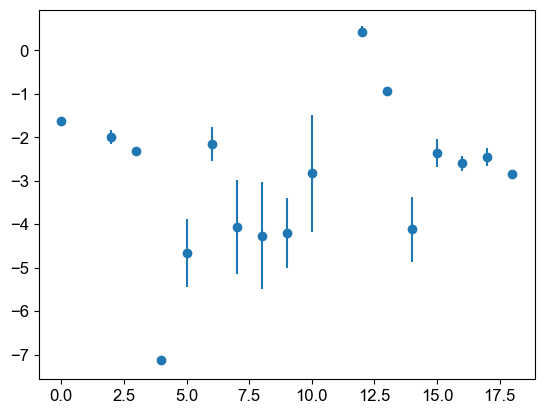

In [174]:
Current_Upper = CurrentOcean.loc[CurrentOcean.Type=="UM"]
Current_Upper.Age = np.round(Current_Upper.Age,-1)
Current_Upper = Current_Upper.sort_values(by="Age")
yerr = Current_Upper.groupby("Age")["Delta_DM"].std()
n_samples = Current_Upper.Age.value_counts().sort_index()
Current_Upper = pd.DataFrame(Current_Upper.groupby("Age")["Delta_DM"].mean())
Current_Upper["yerr"] = yerr.fillna(0)
Current_Upper["Points_per_age"] = n_samples
Current_Upper.yerr = Current_Upper.yerr/np.sqrt(Current_Upper["Points_per_age"])
Current_Upper.rename({"Points_per_age":"Weights"},axis=1,inplace=True)
Age = Current_Upper.index
Current_Upper = Current_Upper.reset_index()
Current_Upper["Age"] = Age
plt.errorbar(Current_Upper.index,
        Current_Upper.Delta_DM,
            yerr=Current_Upper.yerr,
            fmt="o")


In [214]:
%%R -i Current_Upper -o Current_Upper_fit,Current_Upper_conf,Current_Upper_deriv_sint,Current_Upper_sims

library(mgcv)
library(gratia)

m <- gam(Delta_DM ~ s(Age,k=16,bs="ad"),method="REML",data=Current_Upper,weights=Weights)

N <- 300
Current_Upper_fit <- with(Current_Upper, data.frame(Age = seq(min(Age),max(Age),length.out=N)))
Current_Upper_fit <- cbind(Current_Upper_fit, data.frame(predict(m,Current_Upper_fit,se.fit=TRUE)))
crit.t <- qt(0.975, df=df.residual(m))
Current_Upper_fit <- transform(Current_Upper_fit,
                     upper = fit + (crit.t * se.fit),
                     lower = fit - (crit.t * se.fit))

# Posterior Simulation

nsim <- 100

Current_Upper_sims <- simulate(m,nsim=nsim,newdata=Current_Upper_fit,unconditional=TRUE)

#rearrange output
colnames(Current_Upper_sims) <- paste0("sim",seq_len(nsim))
Current_Upper_sims <- setNames(stack(as.data.frame(Current_Upper_sims)),c("Simulated","run"))
Current_Upper_sims <- transform(Current_Upper_sims, Age <- rep(Current_Upper_fit$Age,nsim))


# Simultaneous confidence intervals
Current_Upper_conf <- with(Current_Upper_fit,cbind(Current_Upper_fit,nsim=nsim,type="simultaneous"),Age=Age)

Current_Upper_deriv <- fderiv(m,newdata=Current_Upper_fit,n=N)
Current_Upper_deriv_sint <- with(Current_Upper_fit,
                     cbind(confint(Current_Upper_deriv,nsim=nsim,
                                  type="simultaneous"),
                          Age = Age))
summary(m)

R[write to console]: Use of the `newdata` argument is deprecated.
Instead, use the data argument `data`.





Family: gaussian 
Link function: identity 

Formula:
Delta_DM ~ s(Age, k = 16, bs = "ad")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.4507     0.5581  -4.391 0.000631 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
         edf Ref.df     F p-value  
s(Age) 2.157  2.538 3.458  0.0553 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =   0.21   Deviance explained = 41.5%
-REML = 35.129  Scale est. = 54.174    n = 17


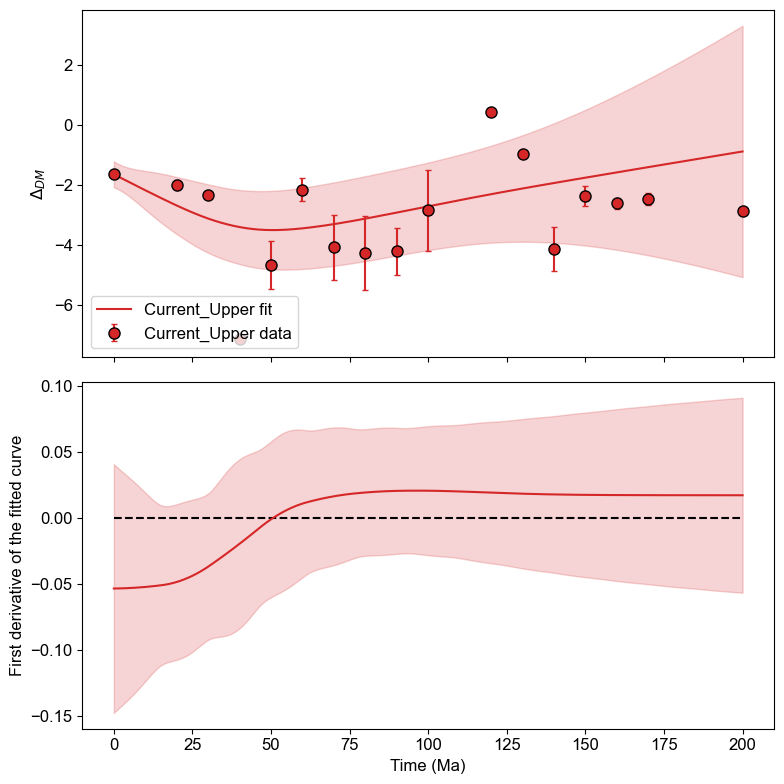

In [215]:
fig,ax = plt.subplots(2,1,figsize=(8,8),sharex=True)


ax[0].plot(Current_Upper_conf.Age,
           Current_Upper_conf.fit,
           color="tab:red",
           label="Current_Upper fit")

ax[0].fill_between(Current_Upper_conf.Age,
                   Current_Upper_conf.lower,
                   Current_Upper_conf.upper,
                   alpha=0.2,
                   color="tab:red")

ax[0].errorbar(
    Current_Upper.Age,
    Current_Upper.Delta_DM,
    yerr=Current_Upper.yerr,
    fmt="o",
    ms=8,
    markeredgecolor="k",
    capsize=2.5,
    color="tab:red",
    label="Current_Upper data",
)

ax[1].plot(
    [0,200],
    [0,0],
    "--k"
)


ax[1].plot(Current_Upper_deriv_sint.Age,
           Current_Upper_deriv_sint.est,
           color="tab:red")

ax[1].fill_between(Current_Upper_deriv_sint.Age,
                   Current_Upper_deriv_sint.lower,
                   Current_Upper_deriv_sint.upper,
                   alpha=0.2,
                   color="tab:red")


# Plot settings
ax[0].set(ylabel="$\Delta_{DM}$")
ax[0].legend(loc="lower left")



ax[1].set(xlabel="Time (Ma)",
          ylabel="First derivative of the fitted curve")

#ax[1].set_xlim(-920, 20)
#ax[1].set_ylim(-0.032,0.03)
#ax[1].set_xticks(np.arange(-900, 1, 100))
#ax[1].set_xticklabels([str(i) for i in np.arange(0, 901, 100)[::-1]])

plt.tight_layout()

In [319]:
def DM_T(age):

    tt = age * 1e6
    lbd_Nd = 6.54e-12
    mu_DM, a_DM = 0.222, 0.51315063799  # Michard et al. 1985 and Goldstein et al. 1984, respectively

    DM = a_DM - mu_DM * (np.exp(lbd_Nd * tt) - 1)

    return DM


def Nd_CHUR(age):

    tt = age * 1e6
    lbd_Nd = 6.54e-12  # Lugmair and Marti 1978
    mu_CHUR, a_CHUR = 0.1967, 0.512638  # Jacobsen and Wasserburg, 1980

    CHUR = a_CHUR - mu_CHUR * (np.exp(lbd_Nd * tt) - 1)

    return CHUR

def eNd_from_deltaDM(df,Age_col,Delta_DM_col):
    Delta = df[Delta_DM_col]
    Age = df[Age_col]
    
    DM = DM_T(Age)
    CHUR = Nd_CHUR(Age)
    
    
    Smp = ((Delta*10**-4)+1)*DM
    
    eNd = ((Smp/CHUR)-1)*1e4
    
    df["eNd_i"] = eNd
    
    return eNd

    
    
    
    
    

In [320]:
a = eNd_from_deltaDM(CurrentOcean,"Age","Delta_DM")
a

0        8.622068
1        6.281235
2        8.036860
3        6.144687
4        8.212423
          ...    
3853    10.500000
3854     7.400000
3855     7.600000
3856     3.300000
3857     7.900000
Length: 3858, dtype: float64

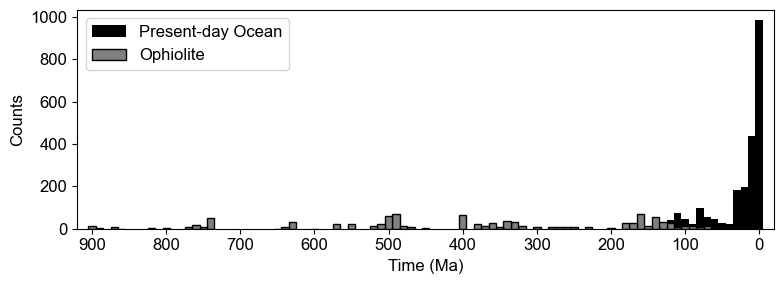

In [101]:
A = np.round(AllData.Age_FromRef,-1)
C = np.round(CurrentOcean.Age.replace("<5",0).astype("float64"),-1).dropna()
fig,ax = plt.subplots(figsize=(8,3))

ax.bar(-C.unique(),height=C.value_counts().sort_index(),width=10,label="Present-day Ocean",color="k")
ax.bar(-A.unique(),height=A.value_counts().sort_index(),width=10,label="Ophiolite",color="gray",ec="k")


ax.legend()
ax.set_xlim(-920, 20)
ax.set_xticks(np.arange(-900, 1, 100))
ax.set_xticklabels([str(i) for i in np.arange(0, 901, 100)[::-1]])

ax.set(xlabel="Time (Ma)",ylabel="Counts")

plt.tight_layout()

savedir = "C:\\Users\\21002223\\OneDrive - Curtin University of Technology Australia\\Papers\\Paper 1\\Figures"
fig.savefig(savedir+"\\Counts_all.png",dpi=300)

In [308]:
CurrentOcean.columns

Index(['Unnamed: 0', 'SAMPLE ID', 'REFERENCES', 'Age', 'Delta_DM',
       'TECTONIC SETTING', 'LATITUDE', 'LONGITUDE', 'Type'],
      dtype='object')

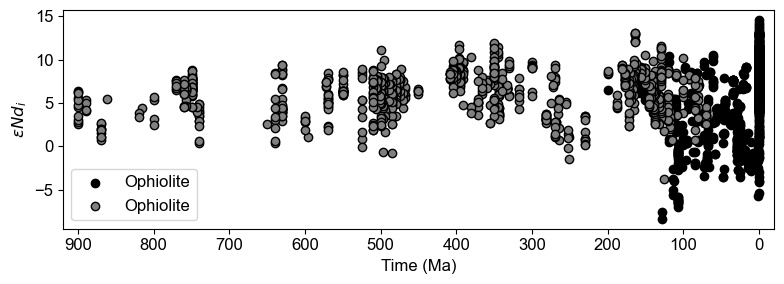

In [325]:
fig,ax = plt.subplots(figsize=(8,3))




ax.scatter(-CurrentOcean.Age,CurrentOcean["eNd_i"],label="Ophiolite",color="black",ec="k")
ax.scatter(-AllData.Age_FromRef,AllData["eNd_i"],label="Ophiolite",color="gray",ec="k")


ax.legend()
ax.set_xlim(-920, 20)
ax.set_xticks(np.arange(-900, 1, 100))
ax.set_xticklabels([str(i) for i in np.arange(0, 901, 100)[::-1]])
#ax.set_yscale("log")
ax.set(xlabel="Time (Ma)",ylabel="$\epsilon Nd_{i}$")

plt.tight_layout()


In [8]:
savedir = r"C:\Users\21002223\OneDrive - Curtin University of Technology Australia\Papers\Paper 1\Figures"

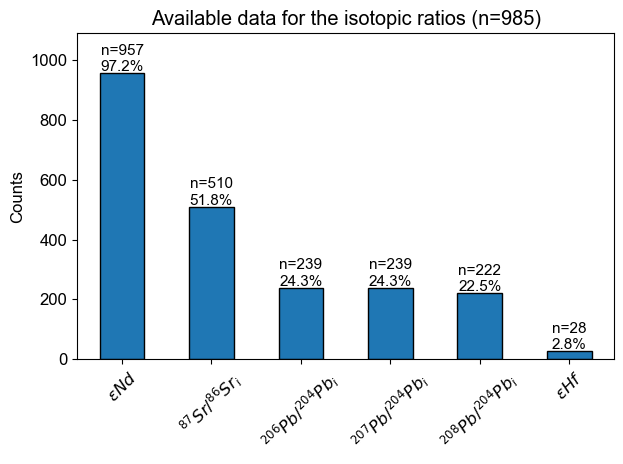

In [9]:
AllData["87Sr/86Sr_i"] = AllData["87Sr/86Sr_i"].astype("float64")

AllData["206Pb/204Pb_i"] = AllData["206Pb/204Pb_i"].astype("float64")
AllData["206Pb/204Pb"] = AllData["206Pb/204Pb"].astype("float64")

AllData["207Pb/204Pb_i"] = AllData["207Pb/204Pb_i"].astype("float64")
AllData["207Pb/204Pb"] = AllData["207Pb/204Pb"].astype("float64")

AllData["208Pb/204Pb_i"] = AllData["208Pb/204Pb_i"].astype("float64")
AllData["208Pb/204Pb"] = AllData["208Pb/204Pb"].astype("float64")


fig,ax = plt.subplots()

ax.axhspan(0,1090, facecolor='white')

AllData[["eNd_i","87Sr/86Sr_i","206Pb/204Pb_i","207Pb/204Pb_i","208Pb/204Pb_i","eHf_i"]].notna().sum().plot(kind="bar",
                                                                                                            ax=ax,
                                                                                                            ec="black")


for bar in ax.patches[1:]:
    ax.annotate(f"n={bar.get_height()}\n{np.round(bar.get_height()*100/len(AllData),1)}%",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()+10), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')
    

    

ax.set_ylim(0,1090)
ax.set_ylabel("Counts")
ax.set_xticklabels(["$\epsilon$$Nd$","$^{87}Sr/^{86}Sr_{i}$","$^{206}Pb/^{204}Pb_{i}$",
                      "$^{207}Pb/^{204}Pb_{i}$","$^{208}Pb/^{204}Pb_{i}$","$\epsilon$$Hf$"],
                     rotation=45)


ax.set_title(f"Available data for the isotopic ratios (n={len(AllData)})")
plt.tight_layout()

fig.savefig(savedir+"\\IsotopeCounts.png",dpi=300,transparent=True)

In [14]:
AllData

,Reference,Ophiolite,Location/Unit,Sample,Lat,Lon,Lithotype,Material,Kind,Age_FromRef,...,Hf,176Lu/177Hf,176Hf/177Hf,2s_Hf,176Hf/177Hf_i,eHf_i,Age_rounded,Class,143Nd_CALC,Delta_DM
0,Mahoney et al. 2002,South Tethyan Suture Zone,NaN,P-29,NaN,NaN,Basalt,WR,OIB,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-70.0,Plume,0.512727,-6.269601
1,Mahoney et al. 2002,South Tethyan Suture Zone,NaN,P-44,NaN,NaN,Basalt,WR,OIB,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-70.0,Plume,0.512712,-6.569308
2,Mahoney et al. 2002,South Tethyan Suture Zone,NaN,P-60,NaN,NaN,Basalt,WR,OIB,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-70.0,Plume,0.512732,-6.169698
3,Mahoney et al. 2002,South Tethyan Suture Zone,NaN,P-69,NaN,NaN,Basalt,WR,OIB,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-70.0,Plume,0.512727,-6.269601
4,Mahoney et al. 2002,South Tethyan Suture Zone,NaN,P-77,NaN,NaN,Basalt,WR,OIB,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-70.0,Plume,0.512758,-5.670187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,"McCulloch and Cameron, 1983",Troodos,NaN,116,NaN,NaN,Basalt,WR,SSZ,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-80.0,UM,0.512754,-5.322471
981,"McCulloch and Cameron, 1983",Troodos,NaN,110,NaN,NaN,Basalt,WR,SSZ,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-80.0,UM,0.512744,-5.522276
982,"McCulloch and Cameron, 1983",Troodos,NaN,92,NaN,NaN,Basalt,WR,SSZ,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-80.0,UM,0.512626,-7.820041
983,"McCulloch and Cameron, 1983",Troodos,NaN,106,NaN,NaN,Basalt,WR,SSZ,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-80.0,UM,0.512570,-8.918972


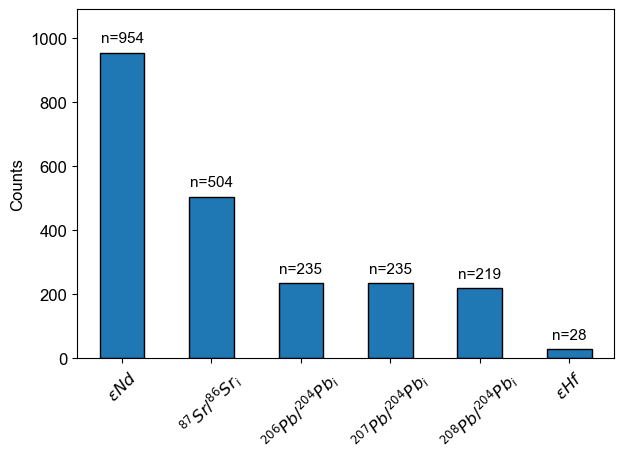

In [17]:
AllData["87Sr/86Sr_i"] = AllData["87Sr/86Sr_i"].astype("float64")

AllData["206Pb/204Pb_i"] = AllData["206Pb/204Pb_i"].astype("float64")
AllData["206Pb/204Pb"] = AllData["206Pb/204Pb"].astype("float64")

AllData["207Pb/204Pb_i"] = AllData["207Pb/204Pb_i"].astype("float64")
AllData["207Pb/204Pb"] = AllData["207Pb/204Pb"].astype("float64")

AllData["208Pb/204Pb_i"] = AllData["208Pb/204Pb_i"].astype("float64")
AllData["208Pb/204Pb"] = AllData["208Pb/204Pb"].astype("float64")


fig,ax = plt.subplots()

ax.axhspan(0,1090, facecolor='white')

AllData[["eNd_i","87Sr/86Sr_i","206Pb/204Pb_i","207Pb/204Pb_i","208Pb/204Pb_i","eHf_i"]].notna().sum().plot(kind="bar",
                                                                                                            ax=ax,
                                                                                                            ec="black")


for bar in ax.patches[1:]:
    ax.annotate(f"n={bar.get_height()}",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()+10), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')
    

    

ax.set_ylim(0,1090)
ax.set_ylabel("Counts")
ax.set_xticklabels(["$\epsilon$$Nd$","$^{87}Sr/^{86}Sr_{i}$","$^{206}Pb/^{204}Pb_{i}$",
                      "$^{207}Pb/^{204}Pb_{i}$","$^{208}Pb/^{204}Pb_{i}$","$\epsilon$$Hf$"],
                     rotation=45)


plt.tight_layout()

fig.savefig(savedir+"\\IsotopeCounts.png",dpi=300,transparent=True)

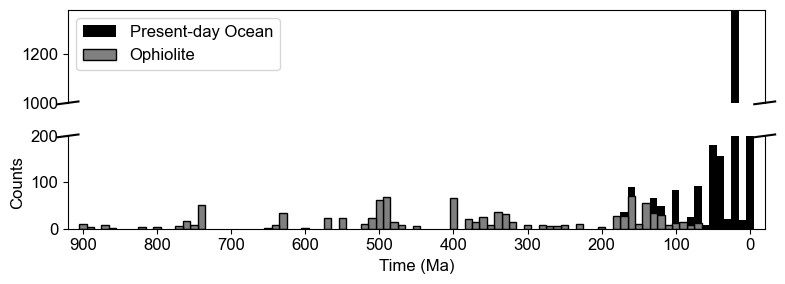

In [131]:
A = np.round(AllData.Age_FromRef,-1)
C = np.round(PresentOcean.Age,-1).dropna()


fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,
                         figsize=(8,3))
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x',which='both',bottom=False)
ax2.spines['top'].set_visible(False)

bs = 200
ts = 1000

ax2.set_ylim(0,bs)
ax1.set_ylim(ts,1380)
ax1.set_yticks(np.arange(1000,1381,200))



ax1.bar(-C.unique(),height=C.value_counts().sort_index(),width=10,label="Present-day Ocean",color="k")
ax1.bar(-A.unique(),height=A.value_counts().sort_index(),width=10,label="Ophiolite",color="gray",ec="k")


ax2.bar(-C.unique(),height=C.value_counts().sort_index(),width=10,label="Present-day Ocean",color="k")
ax2.bar(-A.unique(),height=A.value_counts().sort_index(),width=10,label="Ophiolite",color="gray",ec="k")



for tick in ax2.get_xticklabels():
    tick.set_rotation(0)
d = .015  
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)      
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)


ax1.legend()
ax1.set_xlim(-920, 20)
ax1.set_xticks(np.arange(-900, 1, 100))
ax1.set_xticklabels([str(i) for i in np.arange(0, 901, 100)[::-1]])

ax2.set(xlabel="Time (Ma)",ylabel="Counts")

plt.tight_layout()

savedir = "C:\\Users\\21002223\\OneDrive - Curtin University of Technology Australia\\Papers\\Paper 1\\Figures"
fig.savefig(savedir+"\\Counts_all_broken.pdf")

In [139]:
PresentOcean.Age.value_counts()

0.000000     3590
1.000000       93
11.900000      84
14.500000      62
10.000000      50
             ... 
60.351307       1
47.000000       1
55.304880       1
51.140048       1
0.246000        1
Name: Age, Length: 395, dtype: int64

In [141]:
C

0       20.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
2840     0.0
2841     0.0
2842     0.0
2843     0.0
2844     0.0
Name: Age, Length: 5139, dtype: float64

<BarContainer object of 395 artists>

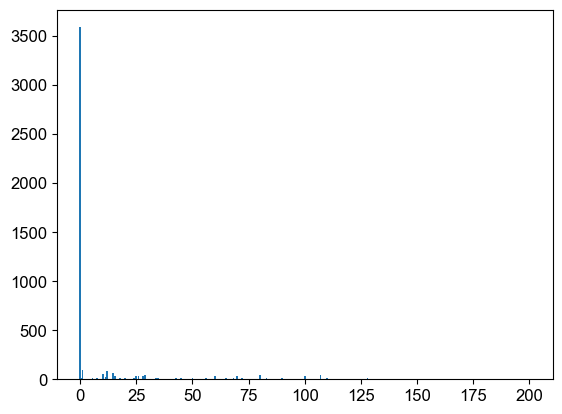

In [140]:
plt.bar(x=PresentOcean.Age.value_counts().index,
        height=PresentOcean.Age.value_counts())

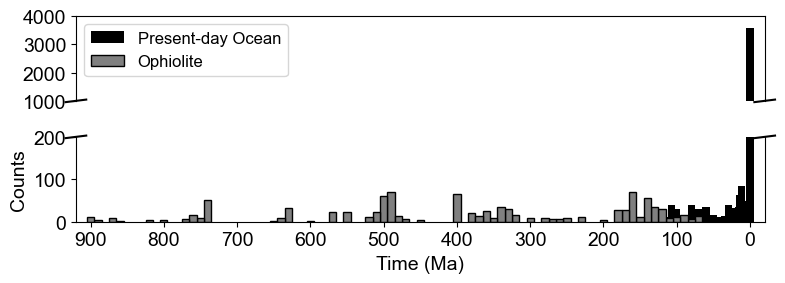

In [147]:
A = np.round(AllData.Age_FromRef,-1)
C = np.round(PresentOcean.Age,-1).dropna()


fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,
                         figsize=(8,3))
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x',which='both',bottom=False)
ax2.spines['top'].set_visible(False)

bs = 200
ts = 1000

ax2.set_ylim(0,bs)
ax1.set_ylim(ts,4000)
ax1.set_yticks(np.arange(1000,4001,1000)[::-1])
ax1.set_yticklabels([str(i) for i in np.arange(1000,4001,1000)[::-1]],fontsize=14)
ax2.set_yticks(np.arange(0,201,100)[::-1])
ax2.set_yticklabels([str(i) for i in np.arange(0,201,100)[::-1]],fontsize=14)


ax1.bar(x=-PresentOcean.Age.value_counts().index,
        height=PresentOcean.Age.value_counts(),width=10,label="Present-day Ocean",color="k")
ax1.bar(-A.unique(),height=A.value_counts().sort_index(),width=10,label="Ophiolite",color="gray",ec="k")


ax2.bar(x=-PresentOcean.Age.value_counts().index,
        height=PresentOcean.Age.value_counts(),width=10,label="Present-day Ocean",color="k")
ax2.bar(-A.unique(),height=A.value_counts().sort_index(),width=10,label="Ophiolite",color="gray",ec="k")



for tick in ax2.get_xticklabels():
    tick.set_rotation(0)
d = .015  
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)      
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)


ax1.legend()
ax1.set_xlim(-920, 20)
ax1.set_xticks(np.arange(-900, 1, 100))
ax2.set_xticklabels([str(i) for i in np.arange(0, 901, 100)[::-1]],fontsize=14)
ax2.set_xlabel("Time (Ma)",fontsize=14)
ax2.set_ylabel("Counts",fontsize=14)



ax2.set(xlabel="Time (Ma)",ylabel="Counts")

plt.tight_layout()

savedir = "C:\\Users\\21002223\\OneDrive - Curtin University of Technology Australia\\Papers\\Paper 1\\Figures"
fig.savefig(savedir+"\\Counts_all_broken.pdf")

In [90]:
Plumes.iloc[33]

Age_rounded          0.000000
Delta_DM            -4.184010
yerr                 0.074887
Points_per_age    1446.000000
Locs_per_age        18.000000
Weights             21.046233
Name: 33, dtype: float64

In [120]:
DDM

array([[-1.58530018],
       [-3.78389609],
       [-3.58402373],
       ...,
       [-7.63962784],
       [-6.80160744],
       [-3.80032507]])

In [111]:
from changeforest import changeforest

C:\Users\21002223\AppData\Local\Temp\ipykernel_23468\1639142566.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  result.plot().show()


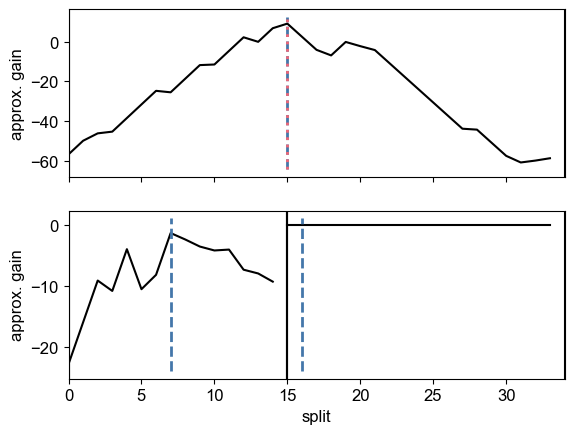

In [123]:
DDM = DDM.reshape((len(DDM),1))
result = changeforest(DDM,"random_forest","bs")
Split_age = Plumes.iloc[result.best_split]["Age_rounded"]
result.plot().show()

In [165]:
Plumes.iloc[14]

Age_rounded      -260.000000
Delta_DM           -4.799715
yerr                0.757239
Points_per_age      6.000000
Locs_per_age        1.000000
Weights             0.087329
New_Age          -300.000000
Name: 14, dtype: float64

In [115]:
print(Split_age)

-250.0


In [207]:
Plumes["inv_DDM"] = Plumes.Delta_DM.apply(lambda x: -x)
Plumes.inv_DDM

0      2.834502
1      3.033211
2      4.621297
3      2.797155
4      1.245970
5      2.641347
6      3.313440
7      2.405599
8      1.620339
9     -0.356122
10     1.160560
11     1.919240
12     5.088080
13     2.350237
14     4.799715
15     6.757517
16     7.960518
17     1.544442
18     4.071008
19     4.099912
20     7.450471
21     6.895234
22     9.031616
23    10.842769
24     7.861352
25     8.501638
26     5.539971
27     9.127795
28     9.069141
29     7.395760
30     6.369481
31     3.557908
32     4.316418
Name: inv_DDM, dtype: float64

In [208]:
eps = 1e-7
X= Plumes.Age_rounded.values.reshape(-1,1)
X_shift = X+eps
y= Plumes.inv_DDM.values.reshape(-1,1)
x_pred = np.arange(-900,1,1).reshape(-1,1)

In [209]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
fit,std = gp.fit(X, y).predict(x_pred,return_std=True)
fit_shift,std_shift = gp.fit(X_shift,y).predict(x_pred,return_std=True)
fit_dif = (fit_shift-fit)/eps
std_dif = (std_shift-std)/eps

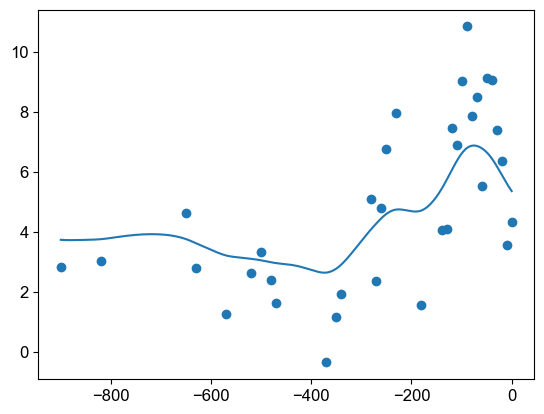

In [210]:
fig,ax = plt.subplots()

ax.plot(x_pred,fit)
ax.scatter(
    Plumes.Age_rounded,
    Plumes.inv_DDM
)

In [169]:
kernel = ConstantKernel()+ Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)

In [63]:
eps = 1e-7
X= Plumes.Age_rounded.values.reshape(-1,1)
X_shift = X+eps
y= Plumes.Delta_DM.values.reshape(-1,1)
x_pred = np.arange(-900,1,1).reshape(-1,1)

In [64]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
fit,std = gp.fit(X, y).predict(x_pred,return_std=True)
fit_shift,std_shift = gp.fit(X_shift,y).predict(x_pred,return_std=True)
fit_dif = (fit_shift-fit)/eps
std_dif = (std_shift-std)/eps

In [65]:
gp.fit(X,y)

GaussianProcessRegressor(kernel=1**2 + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=1))

In [188]:
gp.kernel_

1.28**2 + Matern(length_scale=34.1, nu=1.5) + WhiteKernel(noise_level=1e-05)

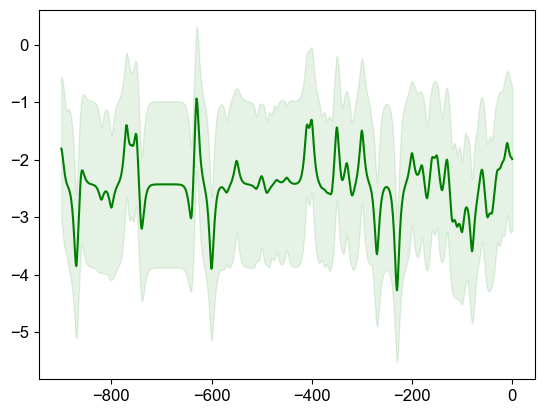

In [67]:
kernel_UM = ConstantKernel()+Matern(length_scale=2,nu=3/2)+WhiteKernel(noise_level=1)
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel_UM)

X_UM = UpperMantle.Age_rounded.values.reshape(-1,1)

y_UM = UpperMantle.Delta_DM.values.reshape(-1,1)
fit_UM,std_UM = gp.fit(X_UM, y_UM).predict(x_pred,return_std=True)
plt.plot(x_pred,fit_UM,color="green",label="Gaussian Process")
plt.fill_between(x_pred.reshape(len(x_pred)),fit_UM+std_UM,fit_UM-std_UM,alpha=0.1,color="green")

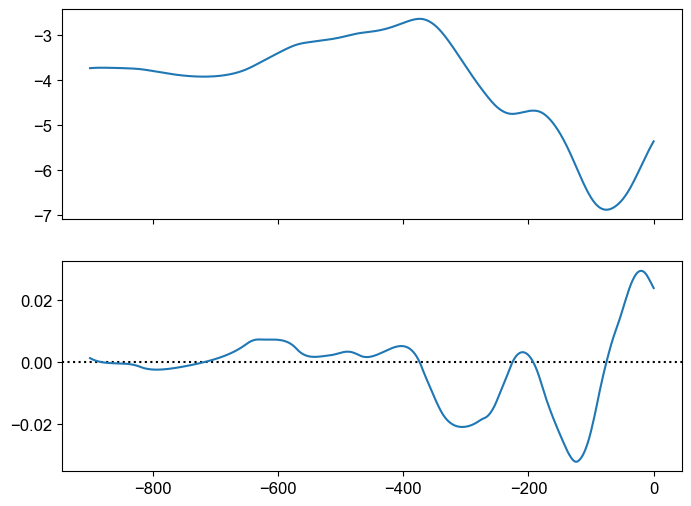

In [68]:
fig,ax = plt.subplots(2,1,figsize=(8,6),sharex=True)

ax[0].plot(x_pred,fit)
ax[1].axhline(y=0,color="k",ls=":")
ax[1].plot(x_pred,-fit_dif)
#ax[1].fill_between(x_pred.reshape(len(x_pred)),-(fit_dif+std_dif),-(fit_dif-std_dif),alpha=0.1)



In [92]:
gp.kernel_

2.44**2 + Matern(length_scale=5.64, nu=1.5) + WhiteKernel(noise_level=1.05)

In [29]:
y_pred, sigma = gp.predict(x_pred, return_std=True)

In [290]:
x_pred.shape

(901, 1)

In [165]:
LOWESS = sm.nonparametric.lowess(exog=Plumes.Age_rounded.values,
                                 endog=Plumes.Delta_DM.values,
                                 xvals=x_pred.reshape(len(x_pred)),
                                 frac=0.5)

In [166]:
sm.__version__

'0.14.0'

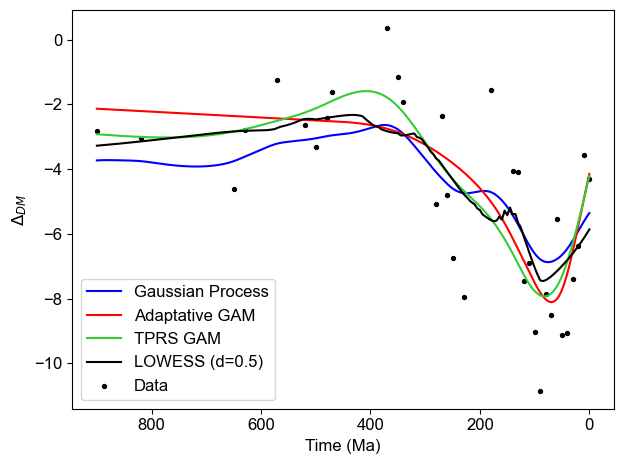

In [69]:
fig,ax = plt.subplots()

ax.plot(x_pred,fit,color="blue",label="Gaussian Process")
ax.plot(Plume_conf.Age_rounded,Plume_conf.fit,color="red",label="Adaptative GAM")
ax.plot(Plume_conf_tp.Age_rounded,Plume_conf_tp.fit,color="limegreen",label="TPRS GAM")
ax.plot(x_pred,LOWESS,color="black",label="LOWESS (d=0.5)")


ax.scatter(Plumes.Age_rounded,Plumes.Delta_DM,s=8,color="black",ec="k",label="Data")

ax.set_xlabel("Time (Ma)")
ax.set_ylabel("$\Delta_{DM}$")
ax.set_xticks([-800,-600,-400,-200,0])
ax.set_xticklabels(["800","600","400","200","0"])
ax.legend()

plt.tight_layout()

fig.savefig(savedir+"\\Non-parametric_comp.png",dpi=300)

In [81]:
import sklearn

In [82]:
sklearn.__version__

'1.2.2'

C:\Users\21002223\AppData\Local\Temp\ipykernel_21792\3723283742.py:306: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


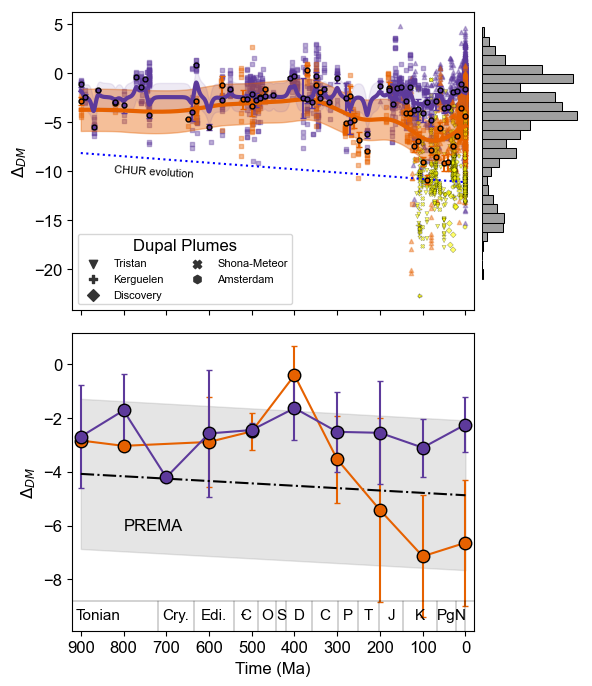

In [164]:
fig,ax = plt.subplots(2,1,figsize=(5,7),sharex=True)


#colorblind friendly colours:
pink = "#E66100"
green = "#5D3A9B"


#ax[0].fill_between(
#    x=[-900,0],
#    y1=[-3.33,-3.89],
#    y2=[-14,-14],
#    color="lightgray",
#    alpha=0.4   
#)


############################### Current ocean data ###############################

#PresentOcean.Age = -PresentOcean.Age
ax[0].scatter(-PresentOcean.loc[PresentOcean.Type=="UM"].Age.replace("<5",0),
              PresentOcean.loc[PresentOcean.Type=="UM"].Delta_DM,
              color=green,
              alpha=0.4,
              marker="^",
              s=9
              )

Dupal_hotspots = ["Tristan","Discovery","Shona-Meteor","Amsterdam","Kerguelen","Heard Island"]

ax[0].scatter(-AMD_OIBs.loc[~AMD_OIBs.Plume.isin(Dupal_hotspots)].Age,
              AMD_OIBs.loc[~AMD_OIBs.Plume.isin(Dupal_hotspots)].Delta_DM,
              color=pink,
              alpha=0.4,
              marker="^",
              s=9
              )

sns.scatterplot(x=-AMD_OIBs.loc[AMD_OIBs.Plume.isin(Dupal_hotspots)].Age,
              y=AMD_OIBs.loc[AMD_OIBs.Plume.isin(Dupal_hotspots)].Delta_DM,
              color="yellow",
              alpha=0.6,
              style=AMD_OIBs.loc[AMD_OIBs.Plume.isin(Dupal_hotspots)].Plume,
              markers=["v","P","D","X","h"],
              ax=ax[0],
              edgecolor="black",
              s=9
              )

#sns.kdeplot(
#    data=PresentOcean.loc[PresentOcean.Type=="UM"],
#    x="Age",
#    y="Delta_DM",
#    levels=10,
#    color=green,
#    cut=0,
#    fill=True,
#    alpha=0.5,
#    ax=ax[0]
#)
#sns.kdeplot(
#    data=PresentOcean.loc[PresentOcean.Type=="Plume"],
#    x="Age",
#    y="Delta_DM",
#    levels=10,
#    color=pink,
#    cut=0,
#    fill=True,
#    alpha=0.5,
#    ax=ax[0]
#)




############################### Ophiolite data ###############################

ax[0].scatter(-UM_oph.Age_FromRef,
              UM_oph.Delta_DM,
              color=green,
              alpha=0.4,
              marker="s",
              s=9
              )


ax[0].scatter(-OIB_oph.Age_FromRef,
              OIB_oph.Delta_DM,
              color=pink,
              alpha=0.4,
              marker="s",
              s=9
              )








############################### Data and fit ###############################


ax[0].fill_between(x_pred.reshape(len(x_pred)),
                   fit-std,
                   fit+std,
                   alpha=0.4,
                   color=pink)

ax[0].fill_between(x_pred.reshape(len(x_pred)),fit_UM+std_UM,fit_UM-std_UM,alpha=0.1,color=green)



ax[0].errorbar(
    Plumes.Age_rounded,
    Plumes.Delta_DM,
    yerr=Plumes.yerr,
    fmt="o",
    ms=3.5,
    markeredgecolor="k",
    capsize=2.5,
    color=pink,
    label="Plume data",
)

ax[0].errorbar(
    UpperMantle.Age_rounded,
    UpperMantle.Delta_DM,
    yerr=UpperMantle.yerr,
    fmt="o",
    ms=3.5,
    markeredgecolor="k",
    capsize=2.5,
    color=green,
    label="Upper mantle data",
)


ax[0].plot(x_pred,fit,color=pink,lw=3)

ax[0].plot(x_pred,
           fit_UM,
           color=green,
           lw=3,
           label="Upper mantle fit")

#Median PREMA
#ax[0].plot(
#    [-900,0],
#    [-4.66266,-5.45596],
#    "-.k"
#)

#IQR
#ax[0].fill_between(
#    [-900,0],
#    [-6.22549,-7.01481],
#    [-3.29517,-4.09197],
#    alpha=0.2,
#    color="gray"
#)






############################### Plot details ###############################


############################### Derivatives ###############################



#ax[1].errorbar(x=Resampled_Plume.Age_rounded,
#            y=Resampled_Plume.fit,
#            yerr=Resampled_Plume["se.fit"],
#            fmt="-s",
#            markeredgecolor="k",
#            capsize=2.5,
#            color=pink
#           )

#ax[1].errorbar(x=Resampled_UM.Age_rounded,
#            y=Resampled_UM.fit,
#            yerr=Resampled_UM["se.fit"],
#            fmt="-s",
#            markeredgecolor="k",
#            capsize=2.5,
#            color=green
#           )





Rounding_bin = 100
Plumes["New_Age"]=((Plumes.Age_rounded/Rounding_bin).round(0))*Rounding_bin
UpperMantle["New_Age"]=((UpperMantle.Age_rounded/Rounding_bin).round(0))*Rounding_bin

ax[1].errorbar(x=Plumes.groupby("New_Age")["New_Age"].unique(),
               y=Plumes.groupby("New_Age")["Delta_DM"].mean(),
               yerr=Plumes.groupby("New_Age")["Delta_DM"].std(),
               fmt="-o",
               capsize=2.5,
               color=pink,
               markeredgecolor="k",
               markersize=9
               
)

ax[1].errorbar(x=UpperMantle.groupby("New_Age")["New_Age"].unique(),
               y=UpperMantle.groupby("New_Age")["Delta_DM"].mean(),
               yerr=UpperMantle.groupby("New_Age")["Delta_DM"].std(),
               fmt="-o",
               capsize=2.5,
               color=green,
               markeredgecolor="k",
               markersize=9
               
)


#Median PREMA
ax[1].plot(
    [-900,0],
    [-4.07659,-4.8714],
    "-.k"
)

#IQR
ax[1].fill_between(
    [-900,0],
    [-6.87017,-7.65783],
    [-1.28302,-2.08496],
    alpha=0.2,
    color="gray"
)



ax[1].annotate("PREMA",xy=(-730,-6),xycoords="data",
                va="center", ha="center",fontsize=12)

############################### Plot settings ###############################

ax[0].set(ylabel="$\Delta_{DM}$")


#h, l = ax[0].get_legend_handles_labels()
#order = [2, 0, 3, 1]
#h = [h[i] for i in order]
#l = [l[i] for i in order]
#ax[0].legend(h, l, loc="lower left",ncols=2)





ax[1].set(xlabel="Time (Ma)",
          ylabel="$\Delta_{DM}$")

ax[1].set_xlim(-920, 20)
ax[1].set_xticks(np.arange(-900, 1, 100))
ax[1].set_xticklabels([str(i) for i in np.arange(0, 901, 100)[::-1]])
ax[0].plot()
ax[0].plot(
    [-900,0],
    [-8.13677,-11.1068],
    ":b"
)
#ax[0].axhline(y=-10.95,ls=":",color="blue")
ax[0].annotate("CHUR evolution",xy=(-730,-10),xycoords="data", rotation=-np.rad2deg(np.arctan(0.06)),
                va="center", ha="center",fontsize=8)
h,l = ax[0].get_legend_handles_labels()
ax[0].legend(h[:5],l[:5],title="Dupal Plumes",ncols=2,fontsize=8)

geoTime(ax[1])



ax3 = fig.add_axes((0.98,0.543,0.2,0.435))


ax3 = sns.histplot(data=AMD_OIBs.loc[AMD_OIBs.Age_rounded==0.],y="Delta_DM",stat="count",color="gray",legend=False)
#ax3.axhline(y=AMD_OIBs.loc[AMD_OIBs.Age_rounded==0.].Delta_DM.quantile(0.25),color="k")
#ax3.axhline(y=AMD_OIBs.loc[AMD_OIBs.Age_rounded==0.].Delta_DM.quantile(0.75),color="k")
#ax3.axhline(y=AMD_OIBs.loc[AMD_OIBs.Age_rounded==0.].Delta_DM.median(),color="k",ls="--")


ax3.set_ylim(-18,2)
for s in ax3.spines:
    ax3.spines[s].set_visible(False)


ax3.set(xlabel="",ylabel="")



ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)



plt.tight_layout()
fig.savefig(savedir+"\\Main_Fig_v5.pdf")

In [56]:
kernel_oph = ConstantKernel() + Matern(length_scale=2, nu=5/2) + WhiteKernel(noise_level=1)
X= PlumeOphiolites.Age_rounded.values.reshape(-1,1)
y= PlumeOphiolites.Delta_DM.values.reshape(-1,1)
x_pred = np.arange(-900,-70,1).reshape(-1,1)
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel_oph)
fit,std = gp.fit(X, y).predict(x_pred,return_std=True)

In [57]:
gp.kernel_

3.97**2 + Matern(length_scale=36.9, nu=2.5) + WhiteKernel(noise_level=2.77)

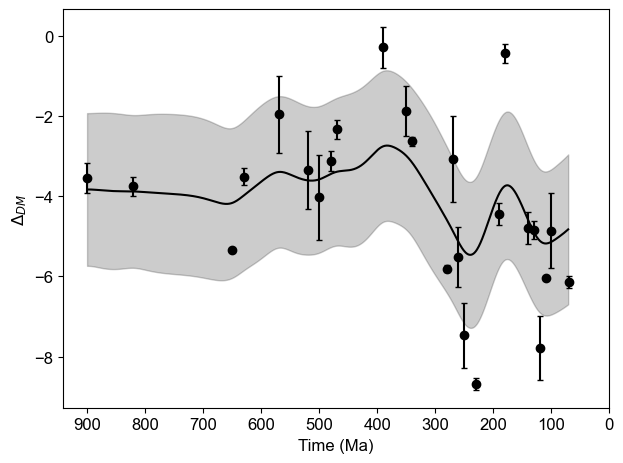

In [61]:
fig,ax = plt.subplots()

ax.errorbar(
    PlumeOphiolites.Age_rounded,
    PlumeOphiolites.Delta_DM,
    yerr=PlumeOphiolites.yerr,
    fmt="o",
    ms=6,
    markeredgecolor="k",
    capsize=2.5,
    color="black",
    label="Plume data",
)


ax.plot(x_pred,
           fit,
           color="black",
           label="TPRS")


ax.fill_between(x_pred.reshape(len(x_pred)),
                fit+std,
                fit-std,
                alpha=0.2,
                color="black")




ax.set_xticks(np.arange(-900, 1, 100))
ax.set_xticklabels([str(i) for i in np.arange(0, 901, 100)[::-1]])
ax.set_xlabel("Time (Ma)")
ax.set_ylabel("$\Delta_{DM}$")


plt.tight_layout()
fig.savefig(savedir+"\\OnlyOphiolites_GP_model.png",dpi=300)

# MOR vs. Back-Arc Fig

In [227]:
BAB = pd.read_excel("BackArcBasalts.xlsx")
BAB.rename({"ND143_ND144":"iso143Nd144Nd"},axis=1,inplace=True)
BAB["Kind"] = np.full(len(BAB),"Back-Arc")
AMD_MOR["Kind"] = np.full(len(AMD_MOR),"Mid-Ocean Ridge")

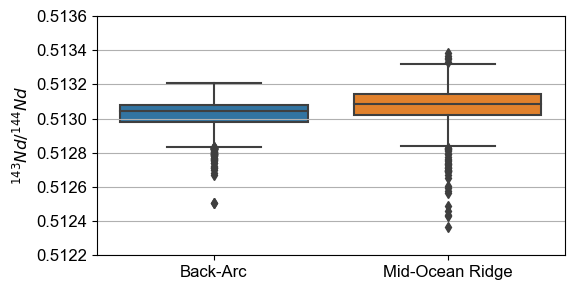

In [246]:
Ridges = pd.concat([BAB,AMD_MOR])
fig,ax = plt.subplots(figsize=(6,3))
ax.grid(axis="y")

sns.boxplot(
    data=Ridges,
    y="iso143Nd144Nd",
    x="Kind",
    ax=ax
)

ax.set_ylim(0.5122,0.5136)
ax.set_xlabel("")
ax.set_ylabel("$^{143}Nd/^{144}Nd$")
plt.tight_layout()
fig.savefig(savedir+"\\BABvsMORB.png",dpi=300)

In [248]:
Nd_from_eNd(10,0)

TypeError: 'int' object is not subscriptable

In [251]:
np.round(((10/1e4)+1)*0.51263,5)

0.51314

In [262]:
pd.Series(dict(zip(x_pred.reshape(len(x_pred)),fit))).max()

6.874300571365422

In [254]:
x_pred

array([[-900],
       [-899],
       [-898],
       [-897],
       [-896],
       [-895],
       [-894],
       [-893],
       [-892],
       [-891],
       [-890],
       [-889],
       [-888],
       [-887],
       [-886],
       [-885],
       [-884],
       [-883],
       [-882],
       [-881],
       [-880],
       [-879],
       [-878],
       [-877],
       [-876],
       [-875],
       [-874],
       [-873],
       [-872],
       [-871],
       [-870],
       [-869],
       [-868],
       [-867],
       [-866],
       [-865],
       [-864],
       [-863],
       [-862],
       [-861],
       [-860],
       [-859],
       [-858],
       [-857],
       [-856],
       [-855],
       [-854],
       [-853],
       [-852],
       [-851],
       [-850],
       [-849],
       [-848],
       [-847],
       [-846],
       [-845],
       [-844],
       [-843],
       [-842],
       [-841],
       [-840],
       [-839],
       [-838],
       [-837],
       [-836],
       [-835],
       [-8

array([-3.27611541, -3.27465234, -3.27318481, -3.27171279, -3.27023631,
       -3.26875537, -3.26726996, -3.2657801 , -3.26428579, -3.26278703,
       -3.26128382, -3.25977617, -3.2582641 , -3.25674759, -3.25522666,
       -3.2537013 , -3.25217154, -3.25063737, -3.2490988 , -3.24755583,
       -3.24600846, -3.24445672, -3.2429006 , -3.2413401 , -3.23977524,
       -3.23820603, -3.23663246, -3.23505454, -3.23347229, -3.23188571,
       -3.23029481, -3.22869959, -3.22710006, -3.22549624, -3.22388812,
       -3.22227572, -3.22065905, -3.21903812, -3.21741292, -3.21578348,
       -3.2141498 , -3.21251189, -3.21086976, -3.20922342, -3.20757288,
       -3.20591816, -3.20425925, -3.20259617, -3.20092893, -3.19925755,
       -3.19758203, -3.19590238, -3.19421862, -3.19253075, -3.1908388 ,
       -3.18914276, -3.18744266, -3.1857385 , -3.1840303 , -3.18231807,
       -3.18060182, -3.17888157, -3.17715733, -3.17542912, -3.17369694,
       -3.17196081, -3.17022075, -3.16847676, -3.16672887, -3.16